# Data Acquisition

## Import Libraries, Function and Files


In [1]:
import io
import os
import pywt
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy import signal
from pywt import wavedec
from scipy.io import loadmat
from scipy.stats import entropy
from scipy.signal import filtfilt
from scipy.signal import butter, lfilter, welch
from sklearn import datasets, linear_model, metrics

In [2]:
# Mengakses seluruh csv file pada drive
raw_data = pd.read_csv('data eeg 1.csv', header = None)

# Membuat dataframe
df_raw = pd.DataFrame(raw_data)
df_raw

0            1            2            3            4    \
0     4498.974121  4498.974121  4498.974121  4498.974121  4498.974121   
1     4501.538574  4501.538574  4501.538574  4501.538574  4501.538574   
2     4502.051270  4502.051270  4502.051270  4502.051270  4502.051270   
3     4504.102539  4504.102539  4504.102539  4504.102539  4504.102539   
4     4504.102539  4504.102539  4504.102539  4504.102539  4504.102539   
...           ...          ...          ...          ...          ...   
6907  4551.794922  4551.794922  4551.794922  4551.794922  4551.794922   
6908  4552.820313  4552.820313  4552.820313  4552.820313  4552.820313   
6909  4552.307617  4552.307617  4552.307617  4552.307617  4552.307617   
6910  4547.179199  4547.179199  4547.179199  4547.179199  4547.179199   
6911  4546.153809  4546.153809  4546.153809  4546.153809  4546.153809   

              5            6            7            8            9    ...  \
0     4498.974121  4498.974121  4498.974121  4498.974121  4498.974121  ...   
1     4501.538574  4501.538574  4501.538574  4501.538574  4501.538574  ...   
2     4502.051270  4502.051270  4502.051270  4502.051270  4502.051270  ...   
3     4504.102539  4504.102539  4504.102539  4504.102539  4504.102539  ...   
4     4504.102539  4504.102539  4504.102539  4504.102539  4504.102539  ...   
...           ...          ...          ...          ...          ...  ...   
6907  4551.794922  4551.794922  4551.794922  4551.794922  4551.794922  ...   
6908  4552.820313  4552.820313  4552.820313  4552.820313  4552.820313  ...   
6909  4552.307617  4552.307617  4552.307617  4552.307617  4552.307617  ...   
6910  4547.179199  4547.179199  4547.179199  4547.179199  4547.179199  ...   
6911  4546.153809  4546.153809  4546.153809  4546.153809  4546.153809  ...   

              270          271          272          273          274  \
0     4498.974121  4498.974121  4498.974121  4498.974121  4498.974121   
1     4501.538574  4501.538574  4501.538574  4501.538574  4501.538574   
2     4502.051270  4502.051270  4502.051270  4502.051270  4502.051270   
3     4504.102539  4504.102539  4504.102539  4504.102539  4504.102539   
4     4504.102539  4504.102539  4504.102539  4504.102539  4504.102539   
...           ...          ...          ...          ...          ...   
6907  4551.794922  4551.794922  4551.794922  4551.794922  4551.794922   
6908  4552.820313  4552.820313  4552.820313  4552.820313  4552.820313   
6909  4552.307617  4552.307617  4552.307617  4552.307617  4552.307617   
6910  4547.179199  4547.179199  4547.179199  4547.179199  4547.179199   
6911  4546.153809  4546.153809  4546.153809  4546.153809  4546.153809   

              275          276          277          278          279  
0     4498.974121  4498.974121  4498.974121  4498.974121  4498.974121  
1     4501.538574  4501.538574  4501.538574  4501.538574  4501.538574  
2     4502.051270  4502.051270  4502.051270  4502.051270  4502.051270  
3     4504.102539  4504.102539  4504.102539  4504.102539  4504.102539  
4     4504.102539  4504.102539  4504.102539  4504.102539  4504.102539  
...           ...          ...          ...          ...          ...  
6907  4551.794922  4551.794922  4551.794922  4551.794922  4551.794922  
6908  4552.820313  4552.820313  4552.820313  4552.820313  4552.820313  
6909  4552.307617  4552.307617  4552.307617  4552.307617  4552.307617  
6910  4547.179199  4547.179199  4547.179199  4547.179199  4547.179199  
6911  4546.153809  4546.153809  4546.153809  4546.153809  4546.153809  

[6912 rows x 280 columns]

## Cropping Data

In [3]:
# Set the sampling frequency in Hz
fs = 128

# Define the time ranges to crop
start_time = 20
end_time = 30
start_time1 = 40
end_time1 = 50

# Convert the time ranges to index ranges
start_idx = int(start_time * fs)
end_idx = int(end_time * fs)
start_idx1 = int(start_time1 * fs)
end_idx1 = int(end_time1 * fs)

# Crop the data to the first time range
hold_hand = df_raw.loc[start_idx:end_idx]

# Crop the data to the second time range
open_hand = df_raw.loc[start_idx1:end_idx1]

hold_hand
hold_hand.to_csv('Hold Hand Raw Data.csv')

In [4]:
open_hand
open_hand.to_csv('Open Hand Raw Data.csv')

In [5]:
hold_hand

0            1            2            3            4    \
2560  4517.435547  4517.435547  4517.435547  4517.435547  4517.435547   
2561  4512.307617  4512.307617  4512.307617  4512.307617  4512.307617   
2562  4512.307617  4512.307617  4512.307617  4512.307617  4512.307617   
2563  4515.384277  4515.384277  4515.384277  4515.384277  4515.384277   
2564  4514.871582  4514.871582  4514.871582  4514.871582  4514.871582   
...           ...          ...          ...          ...          ...   
3836  4506.666504  4506.666504  4506.666504  4506.666504  4506.666504   
3837  4505.641113  4505.641113  4505.641113  4505.641113  4505.641113   
3838  4506.153809  4506.153809  4506.153809  4506.153809  4506.153809   
3839  4505.641113  4505.641113  4505.641113  4505.641113  4505.641113   
3840  4505.641113  4505.641113  4505.641113  4505.641113  4505.641113   

              5            6            7            8            9    ...  \
2560  4517.435547  4517.435547  4517.435547  4517.435547  4517.435547  ...   
2561  4512.307617  4512.307617  4512.307617  4512.307617  4512.307617  ...   
2562  4512.307617  4512.307617  4512.307617  4512.307617  4512.307617  ...   
2563  4515.384277  4515.384277  4515.384277  4515.384277  4515.384277  ...   
2564  4514.871582  4514.871582  4514.871582  4514.871582  4514.871582  ...   
...           ...          ...          ...          ...          ...  ...   
3836  4506.666504  4506.666504  4506.666504  4506.666504  4506.666504  ...   
3837  4505.641113  4505.641113  4505.641113  4505.641113  4505.641113  ...   
3838  4506.153809  4506.153809  4506.153809  4506.153809  4506.153809  ...   
3839  4505.641113  4505.641113  4505.641113  4505.641113  4505.641113  ...   
3840  4505.641113  4505.641113  4505.641113  4505.641113  4505.641113  ...   

              270          271          272          273          274  \
2560  4517.435547  4517.435547  4517.435547  4517.435547  4517.435547   
2561  4512.307617  4512.307617  4512.307617  4512.307617  4512.307617   
2562  4512.307617  4512.307617  4512.307617  4512.307617  4512.307617   
2563  4515.384277  4515.384277  4515.384277  4515.384277  4515.384277   
2564  4514.871582  4514.871582  4514.871582  4514.871582  4514.871582   
...           ...          ...          ...          ...          ...   
3836  4506.666504  4506.666504  4506.666504  4506.666504  4506.666504   
3837  4505.641113  4505.641113  4505.641113  4505.641113  4505.641113   
3838  4506.153809  4506.153809  4506.153809  4506.153809  4506.153809   
3839  4505.641113  4505.641113  4505.641113  4505.641113  4505.641113   
3840  4505.641113  4505.641113  4505.641113  4505.641113  4505.641113   

              275          276          277          278          279  
2560  4517.435547  4517.435547  4517.435547  4517.435547  4517.435547  
2561  4512.307617  4512.307617  4512.307617  4512.307617  4512.307617  
2562  4512.307617  4512.307617  4512.307617  4512.307617  4512.307617  
2563  4515.384277  4515.384277  4515.384277  4515.384277  4515.384277  
2564  4514.871582  4514.871582  4514.871582  4514.871582  4514.871582  
...           ...          ...          ...          ...          ...  
3836  4506.666504  4506.666504  4506.666504  4506.666504  4506.666504  
3837  4505.641113  4505.641113  4505.641113  4505.641113  4505.641113  
3838  4506.153809  4506.153809  4506.153809  4506.153809  4506.153809  
3839  4505.641113  4505.641113  4505.641113  4505.641113  4505.641113  
3840  4505.641113  4505.641113  4505.641113  4505.641113  4505.641113  

[1281 rows x 280 columns]

In [6]:
open_hand

0            1            2            3            4    \
5120  4528.205078  4528.205078  4528.205078  4528.205078  4528.205078   
5121  4525.127930  4525.127930  4525.127930  4525.127930  4525.127930   
5122  4524.102539  4524.102539  4524.102539  4524.102539  4524.102539   
5123  4522.051270  4522.051270  4522.051270  4522.051270  4522.051270   
5124  4525.127930  4525.127930  4525.127930  4525.127930  4525.127930   
...           ...          ...          ...          ...          ...   
6396  4502.563965  4502.563965  4502.563965  4502.563965  4502.563965   
6397  4506.153809  4506.153809  4506.153809  4506.153809  4506.153809   
6398  4503.589844  4503.589844  4503.589844  4503.589844  4503.589844   
6399  4504.102539  4504.102539  4504.102539  4504.102539  4504.102539   
6400  4505.127930  4505.127930  4505.127930  4505.127930  4505.127930   

              5            6            7            8            9    ...  \
5120  4528.205078  4528.205078  4528.205078  4528.205078  4528.205078  ...   
5121  4525.127930  4525.127930  4525.127930  4525.127930  4525.127930  ...   
5122  4524.102539  4524.102539  4524.102539  4524.102539  4524.102539  ...   
5123  4522.051270  4522.051270  4522.051270  4522.051270  4522.051270  ...   
5124  4525.127930  4525.127930  4525.127930  4525.127930  4525.127930  ...   
...           ...          ...          ...          ...          ...  ...   
6396  4502.563965  4502.563965  4502.563965  4502.563965  4502.563965  ...   
6397  4506.153809  4506.153809  4506.153809  4506.153809  4506.153809  ...   
6398  4503.589844  4503.589844  4503.589844  4503.589844  4503.589844  ...   
6399  4504.102539  4504.102539  4504.102539  4504.102539  4504.102539  ...   
6400  4505.127930  4505.127930  4505.127930  4505.127930  4505.127930  ...   

              270          271          272          273          274  \
5120  4528.205078  4528.205078  4528.205078  4528.205078  4528.205078   
5121  4525.127930  4525.127930  4525.127930  4525.127930  4525.127930   
5122  4524.102539  4524.102539  4524.102539  4524.102539  4524.102539   
5123  4522.051270  4522.051270  4522.051270  4522.051270  4522.051270   
5124  4525.127930  4525.127930  4525.127930  4525.127930  4525.127930   
...           ...          ...          ...          ...          ...   
6396  4502.563965  4502.563965  4502.563965  4502.563965  4502.563965   
6397  4506.153809  4506.153809  4506.153809  4506.153809  4506.153809   
6398  4503.589844  4503.589844  4503.589844  4503.589844  4503.589844   
6399  4504.102539  4504.102539  4504.102539  4504.102539  4504.102539   
6400  4505.127930  4505.127930  4505.127930  4505.127930  4505.127930   

              275          276          277          278          279  
5120  4528.205078  4528.205078  4528.205078  4528.205078  4528.205078  
5121  4525.127930  4525.127930  4525.127930  4525.127930  4525.127930  
5122  4524.102539  4524.102539  4524.102539  4524.102539  4524.102539  
5123  4522.051270  4522.051270  4522.051270  4522.051270  4522.051270  
5124  4525.127930  4525.127930  4525.127930  4525.127930  4525.127930  
...           ...          ...          ...          ...          ...  
6396  4502.563965  4502.563965  4502.563965  4502.563965  4502.563965  
6397  4506.153809  4506.153809  4506.153809  4506.153809  4506.153809  
6398  4503.589844  4503.589844  4503.589844  4503.589844  4503.589844  
6399  4504.102539  4504.102539  4504.102539  4504.102539  4504.102539  
6400  4505.127930  4505.127930  4505.127930  4505.127930  4505.127930  

[1281 rows x 280 columns]

In [7]:
hold_f3 = pd.read_csv('hold hand f3.csv', header = None)
hold_f3

0            1            2            3            4   \
0     4174.871582  4261.538574  4502.563965  4336.410156  4192.820313   
1     4178.974121  4269.743652  4503.589844  4337.436035  4194.358887   
2     4173.846191  4272.820313  4504.615234  4340.000000  4192.307617   
3     4163.076660  4274.871582  4498.461426  4344.102539  4192.820313   
4     4157.948730  4284.102539  4496.410156  4342.051270  4193.333008   
...           ...          ...          ...          ...          ...   
1276  4413.333008  4369.230469  4408.205078  4411.794922  4110.769043   
1277  4418.461426  4372.820313  4374.871582  4415.897461  4117.948730   
1278  4415.384277  4380.512695  4365.641113  4420.000000  4110.769043   
1279  4413.333008  4378.974121  4369.743652  4425.127930  4107.179199   
1280  4410.769043  4374.871582  4362.563965  4430.256348  4117.436035   

               5            6            7            8            9   \
0     4254.871582  4383.589844  4309.230469  4295.897461  4400.000000   
1     4262.563965  4384.615234  4304.615234  4307.692383  4407.179199   
2     4264.615234  4381.538574  4302.563965  4319.487305  4405.641113   
3     4264.102539  4376.410156  4302.051270  4318.974121  4404.615234   
4     4268.205078  4375.897461  4302.051270  4314.358887  4405.641113   
...           ...          ...          ...          ...          ...   
1276  4343.589844  4393.333008  4400.512695  4315.897461  4330.256348   
1277  4344.102539  4398.461426  4399.487305  4321.538574  4316.410156   
1278  4342.051270  4396.922852  4402.563965  4326.666504  4306.153809   
1279  4346.153809  4393.333008  4404.615234  4334.871582  4298.974121   
1280  4350.769043  4391.281738  4400.000000  4336.922852  4265.641113   

               10           11           12           13           14  \
0     4440.000000  4333.846191  4362.051270  4100.512695  4347.179199   
1     4433.333008  4331.281738  4363.589844  4101.025391  4344.102539   
2     4426.666504  4333.333008  4361.538574  4104.102539  4333.333008   
3     4430.769043  4336.922852  4357.948730  4112.820313  4330.769043   
4     4438.974121  4329.743652  4356.922852  4112.307617  4327.692383   
...           ...          ...          ...          ...          ...   
1276  4331.281738  4441.538574  4234.358887  4214.871582  4289.230469   
1277  4326.666504  4445.641113  4236.922852  4211.281738  4288.717773   
1278  4322.563965  4454.358887  4241.025391  4188.717773  4288.205078   
1279  4327.692383  4459.487305  4237.436035  4144.102539  4284.615234   
1280  4330.769043  4447.179199  4241.025391  4118.461426  4283.589844   

               15           16           17           18           19  
0     4194.358887  4411.281738  4253.846191  4369.743652  4327.179199  
1     4195.384277  4401.538574  4252.820313  4375.384277  4329.230469  
2     4200.512695  4401.025391  4250.769043  4374.871582  4326.666504  
3     4196.922852  4413.846191  4258.974121  4366.666504  4326.153809  
4     4193.333008  4416.922852  4260.000000  4363.076660  4326.153809  
...           ...          ...          ...          ...          ...  
1276  4372.307617  4321.538574  4330.769043  4171.794922  4160.512695  
1277  4374.358887  4321.538574  4331.794922  4177.436035  4162.563965  
1278  4373.333008  4318.974121  4340.000000  4181.025391  4167.692383  
1279  4371.794922  4315.384277  4346.153809  4187.179199  4176.922852  
1280  4371.281738  4322.563965  4351.794922  4191.794922  4175.897461  

[1281 rows x 20 columns]

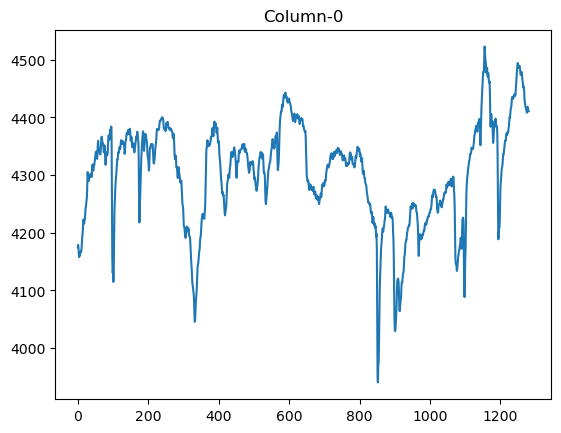

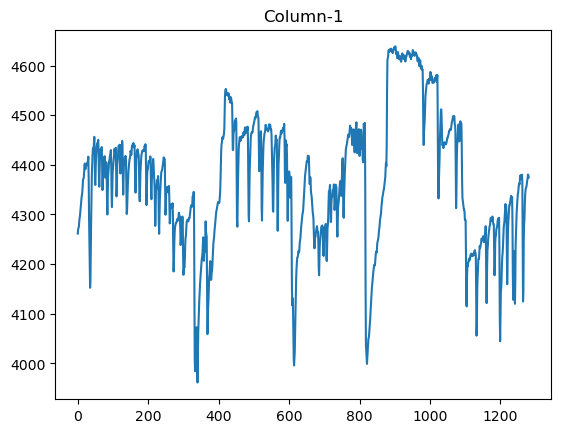

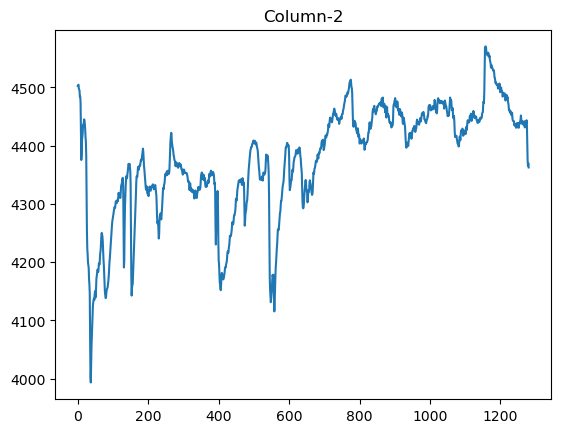

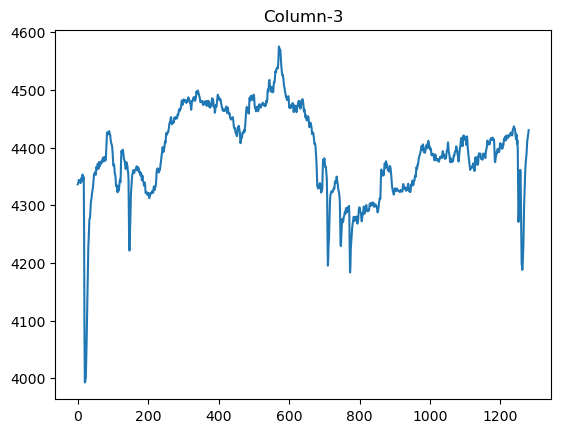

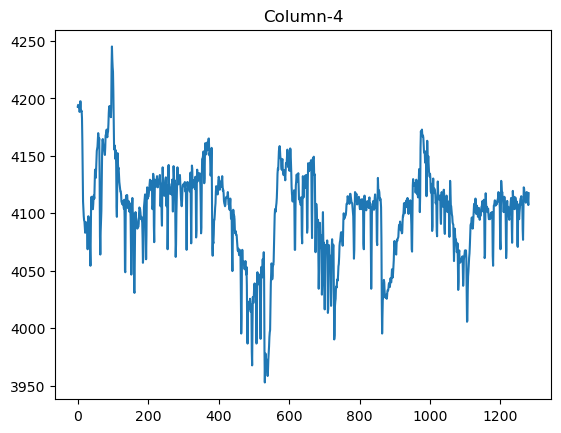

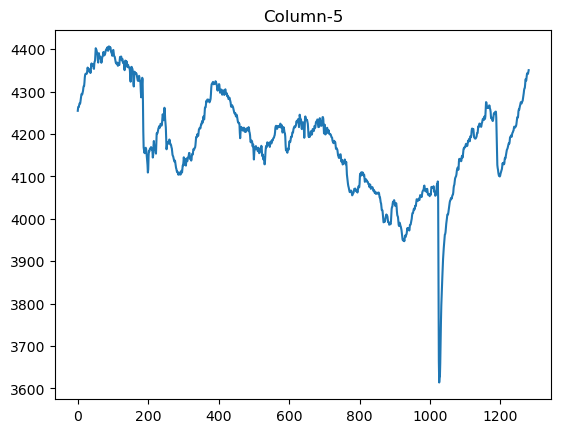

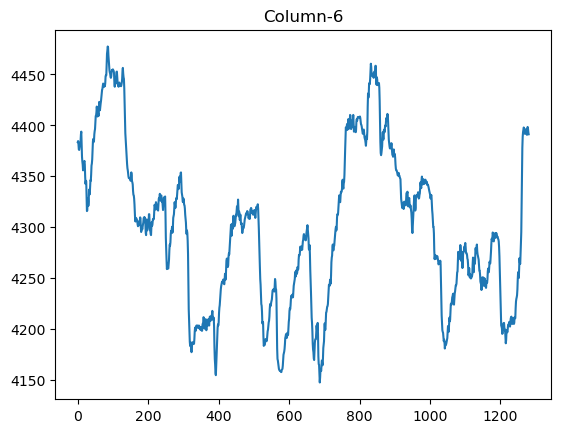

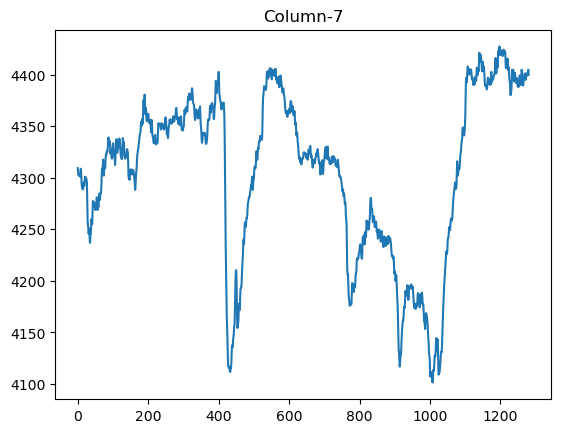

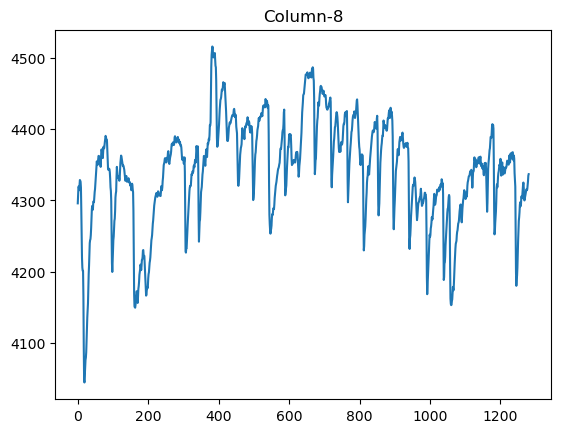

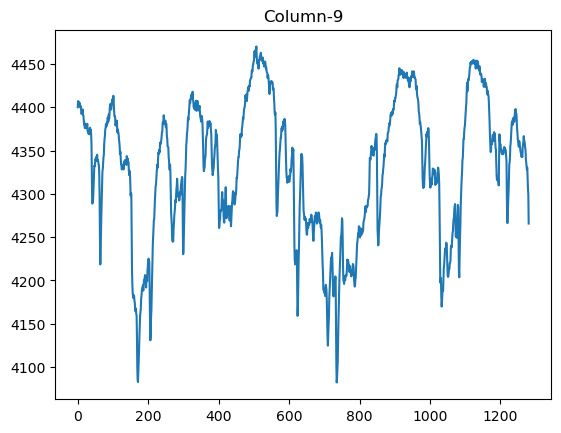

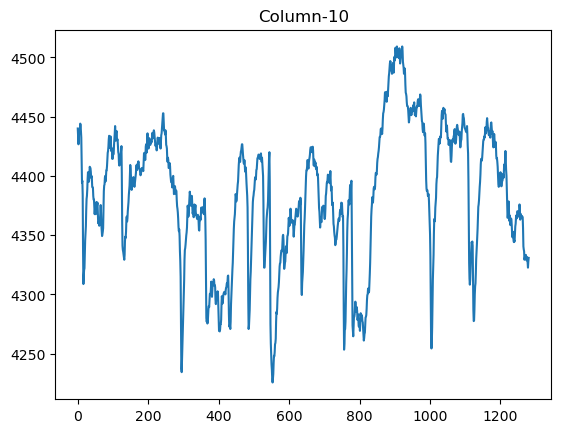

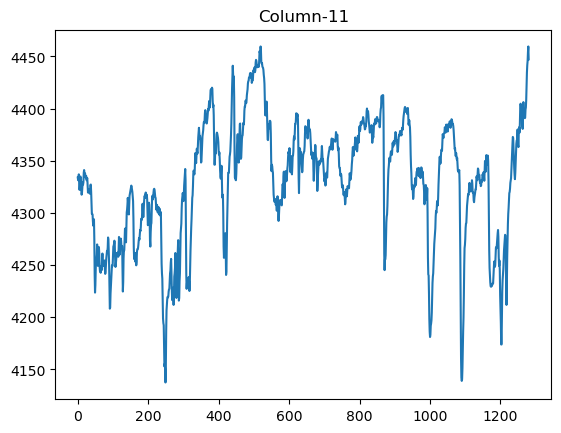

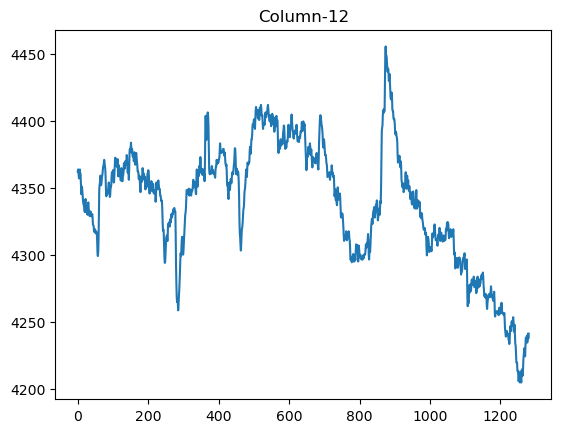

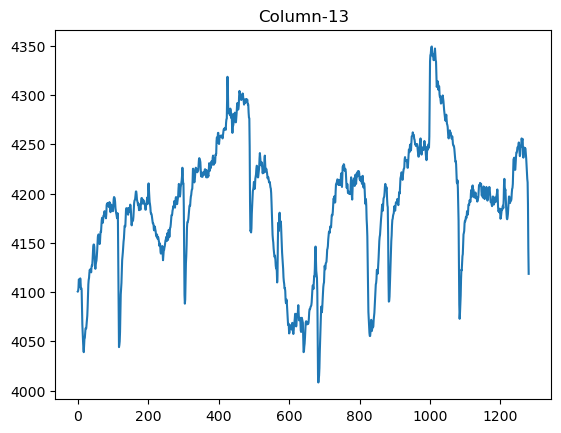

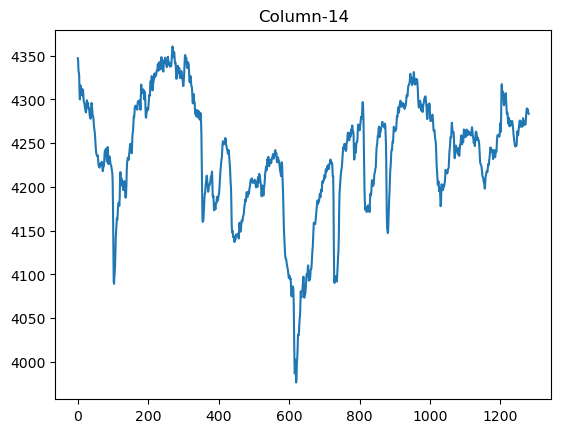

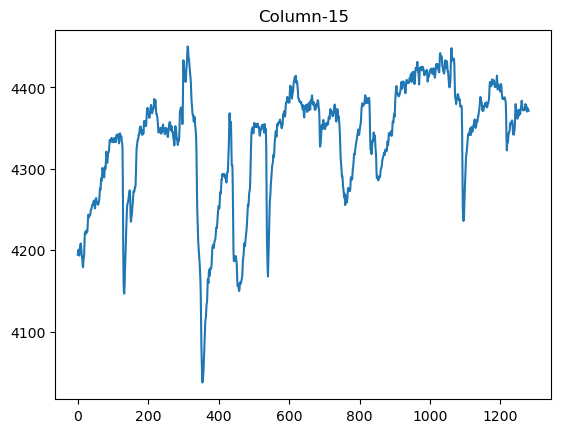

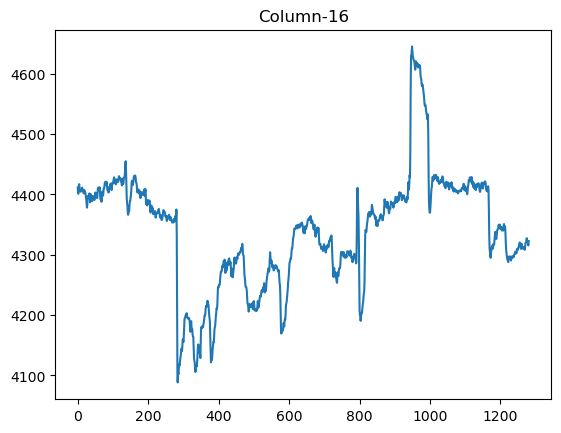

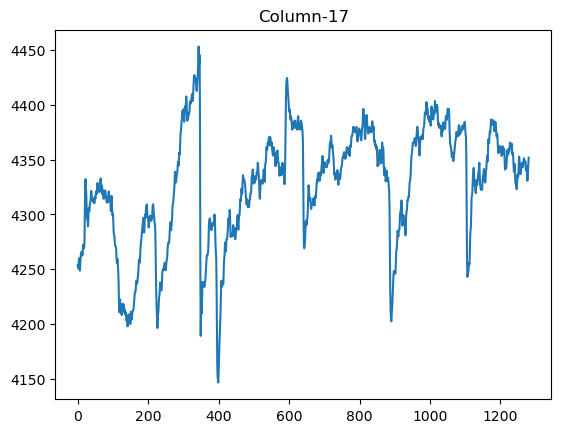

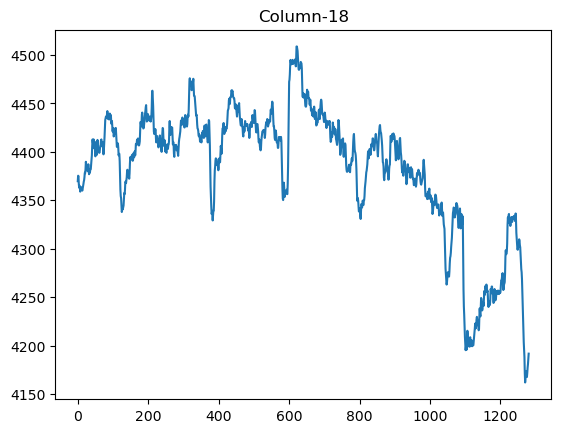

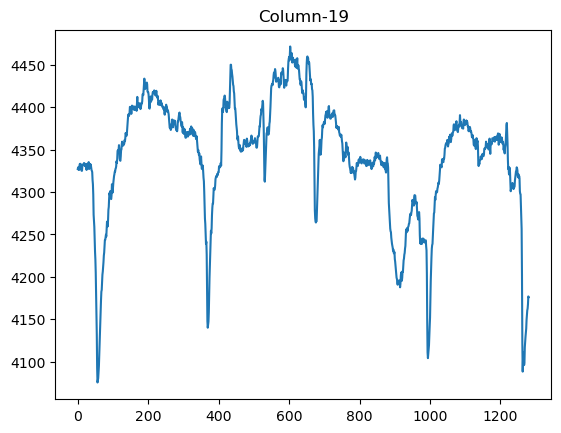

In [8]:
# Original Hold Hand F3
for column in hold_f3.columns:  # Loop melalui kolom-kolom DataFrame
  plt.figure()
  plt.title(f"Column-{column}")  # Display the custom title
  plt.plot(hold_f3[column])
  plt.show()

In [9]:
open_f3 = pd.read_csv('open hand f3.csv', header = None)
open_f3

0            1            2            3            4   \
0     4275.897461  4336.922852  4444.615234  4615.384277  4026.666504   
1     4280.512695  4306.153809  4444.102539  4612.820313  4015.384521   
2     4276.410156  4288.205078  4447.179199  4604.615234  4016.410156   
3     4277.948730  4290.256348  4450.256348  4598.974121  4006.666504   
4     4277.436035  4293.333008  4447.692383  4602.051270  3978.461426   
...           ...          ...          ...          ...          ...   
1276  4310.769043  4301.538574  4373.333008  4321.025391  4212.307617   
1277  4317.948730  4298.974121  4380.000000  4318.974121  4206.153809   
1278  4327.692383  4288.205078  4378.974121  4306.666504  4198.974121   
1279  4332.820313  4285.641113  4376.922852  4276.922852  4201.025391   
1280  4329.743652  4292.820313  4378.461426  4262.051270  4204.615234   

               5            6            7            8            9   \
0     4141.025391  4318.461426  4300.512695  4463.589844  4288.205078   
1     4143.076660  4319.487305  4302.051270  4463.076660  4253.846191   
2     4143.076660  4317.948730  4304.615234  4464.615234  4204.615234   
3     4146.153809  4317.436035  4329.230469  4467.692383  4168.205078   
4     4148.205078  4324.102539  4348.717773  4466.666504  4164.615234   
...           ...          ...          ...          ...          ...   
1276  4517.435547  4386.153809  4333.846191  4096.922852  4402.051270   
1277  4517.948730  4378.974121  4342.051270  4100.000000  4400.000000   
1278  4513.333008  4376.410156  4350.256348  4097.948730  4401.538574   
1279  4512.820313  4381.025391  4347.692383  4100.512695  4411.794922   
1280  4517.948730  4381.538574  4347.692383  4109.743652  4409.743652   

               10           11           12           13           14  \
0     4357.435547  4252.820313  4414.871582  4269.230469  4281.538574   
1     4364.102539  4254.358887  4413.846191  4271.794922  4284.615234   
2     4373.846191  4258.974121  4408.205078  4267.692383  4288.717773   
3     4377.948730  4265.127930  4410.256348  4266.153809  4289.230469   
4     4369.743652  4267.692383  4417.948730  4265.127930  4291.794922   
...           ...          ...          ...          ...          ...   
1276  4239.487305  4361.538574  4469.743652  4238.974121  4151.794922   
1277  4253.846191  4360.000000  4476.922852  4237.948730  4165.127930   
1278  4221.538574  4342.051270  4483.589844  4239.487305  4179.487305   
1279  4145.641113  4317.948730  4485.127930  4241.025391  4181.538574   
1280  4085.640869  4313.333008  4486.666504  4244.615234  4176.922852   

               15           16           17           18           19  
0     4258.461426  4406.666504  4409.743652  4403.076660  4382.563965  
1     4275.897461  4410.769043  4409.743652  4407.692383  4382.563965  
2     4287.179199  4410.256348  4406.153809  4407.179199  4380.000000  
3     4300.000000  4404.615234  4411.281738  4402.563965  4373.846191  
4     4312.307617  4405.127930  4420.512695  4400.512695  4366.153809  
...           ...          ...          ...          ...          ...  
1276  4283.589844  4331.794922  4392.820313  4327.692383  4397.435547  
1277  4287.692383  4335.384277  4391.281738  4321.538574  4402.051270  
1278  4292.307617  4330.769043  4392.307617  4317.948730  4398.461426  
1279  4302.051270  4327.692383  4389.743652  4313.333008  4394.358887  
1280  4307.692383  4329.230469  4386.666504  4309.230469  4393.333008  

[1281 rows x 20 columns]

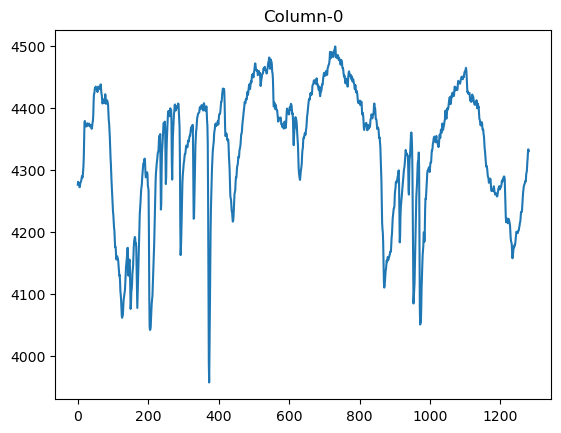

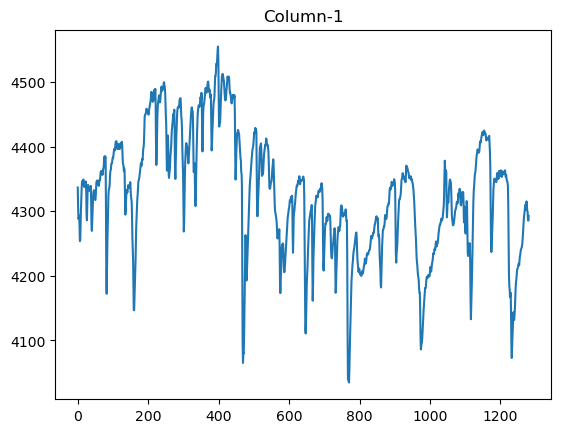

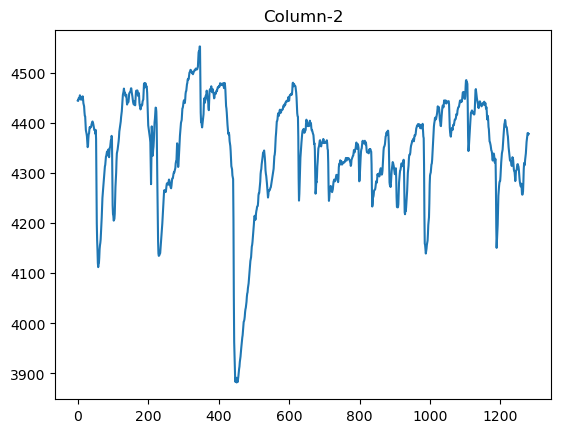

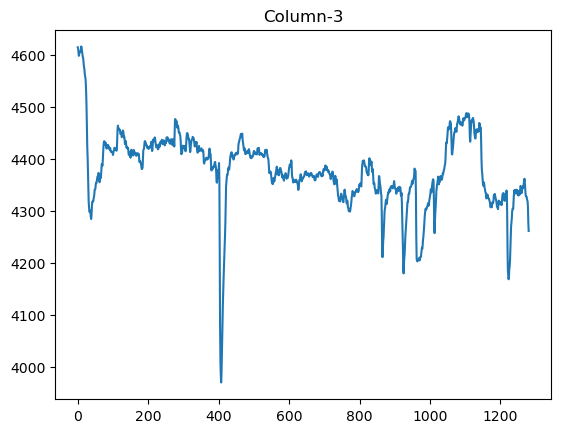

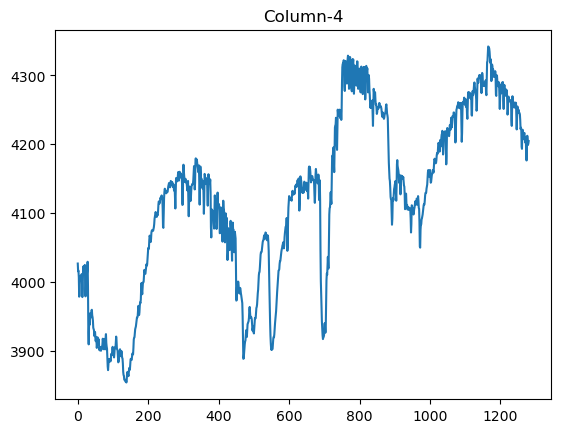

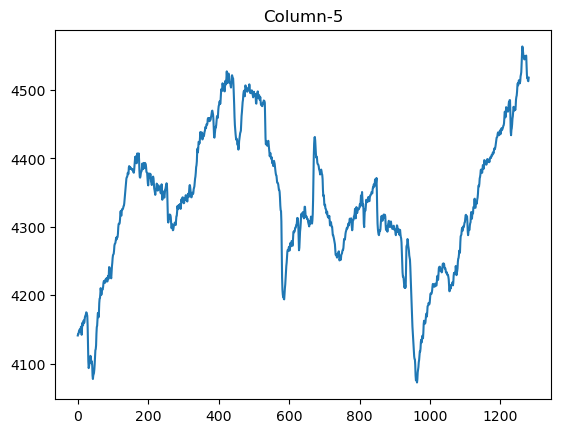

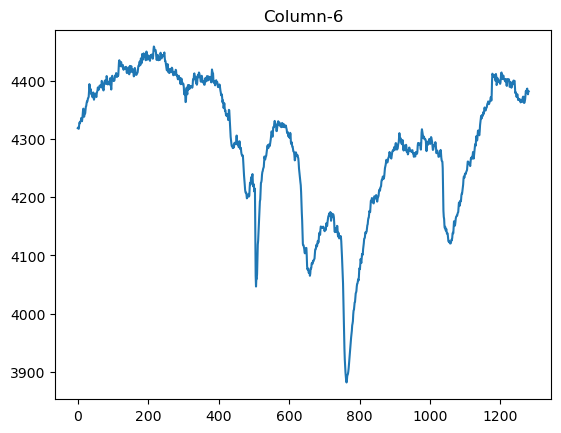

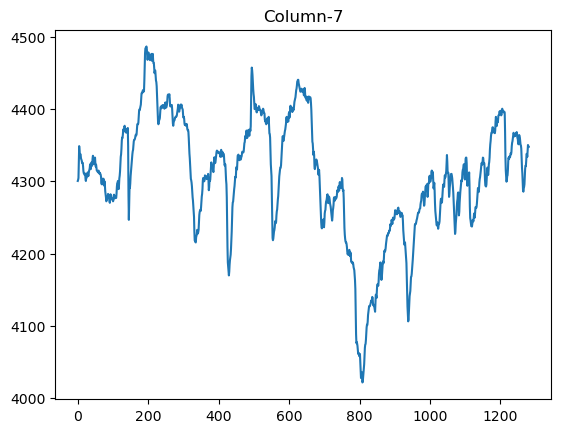

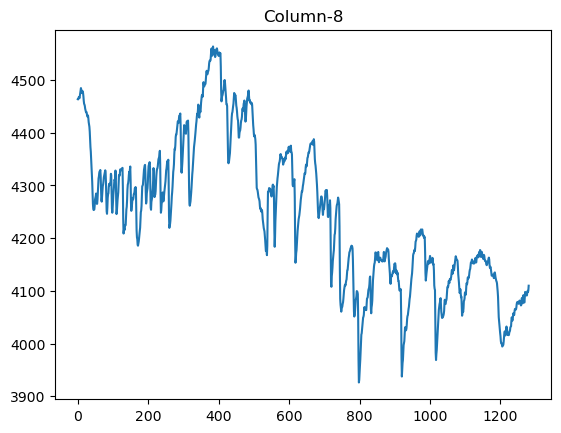

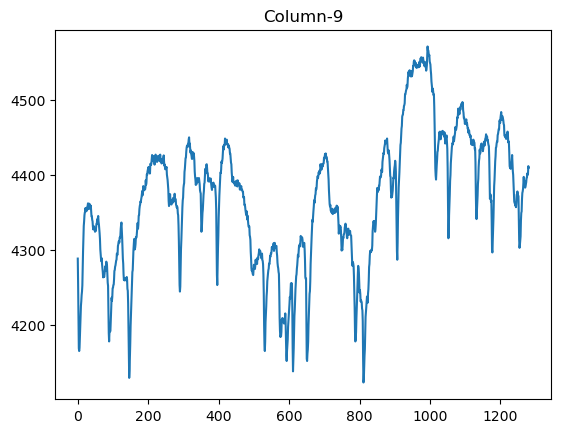

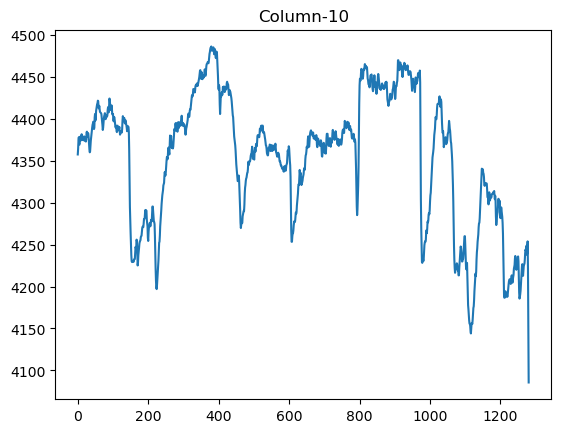

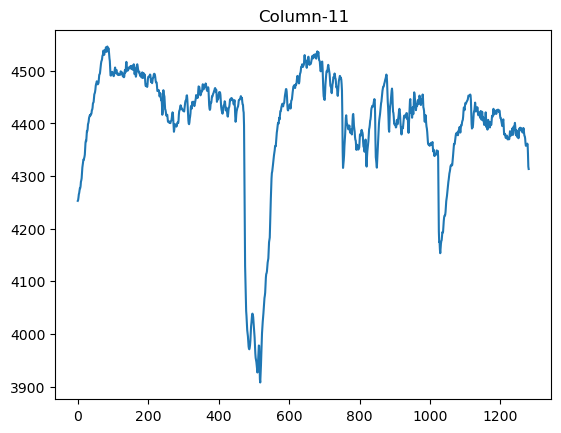

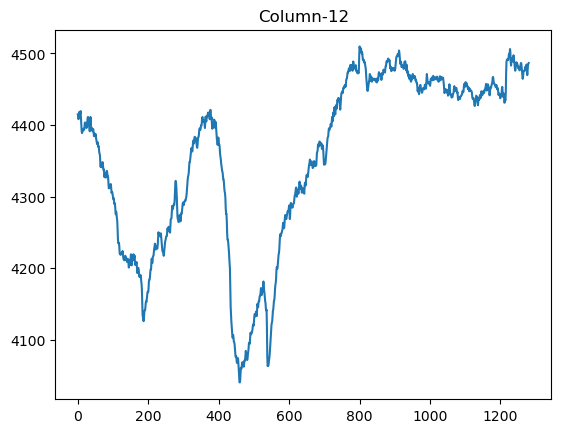

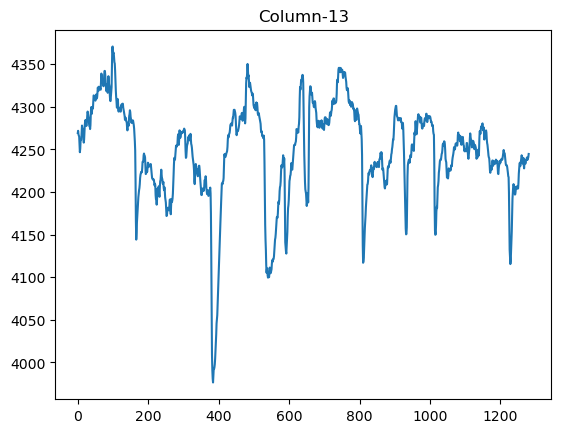

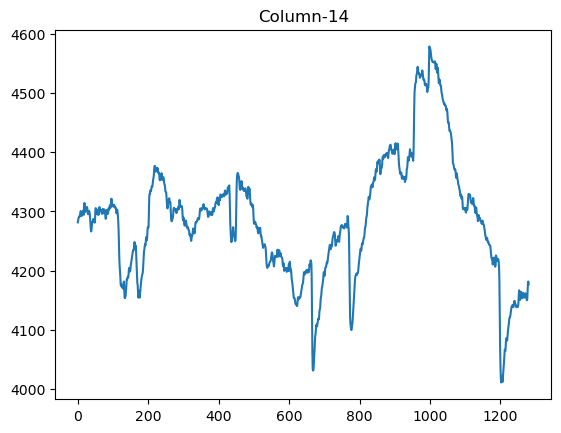

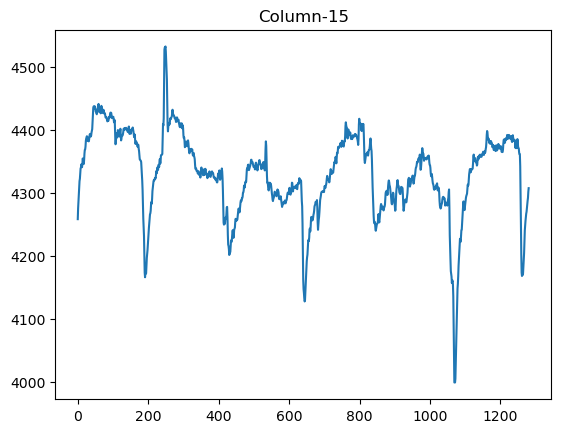

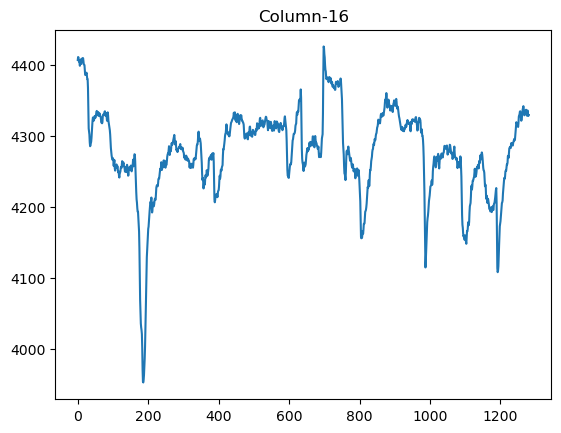

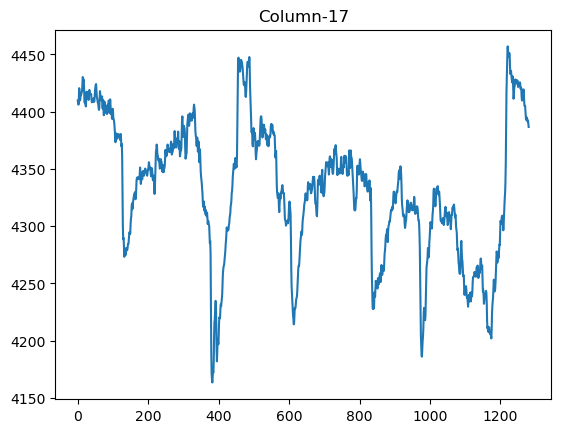

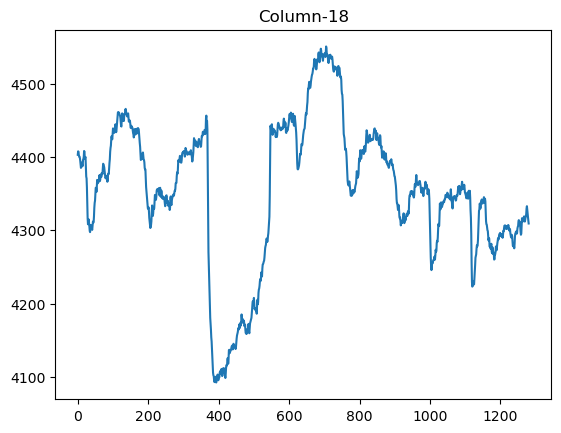

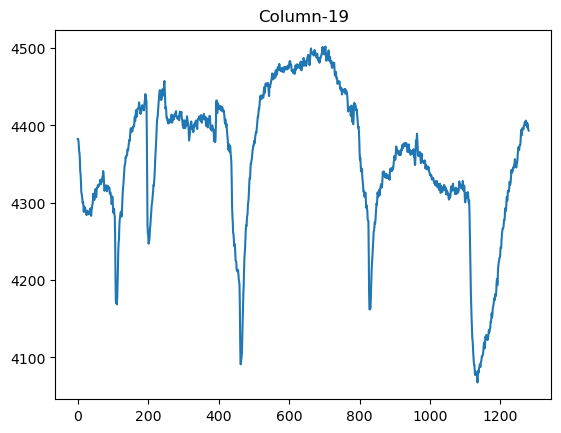

In [10]:
# Original Open F3
for column in open_f3.columns:  # Loop melalui kolom-kolom DataFrame
  plt.figure()
  plt.title(f"Column-{column}")  # Display the custom title
  plt.plot(open_f3[column])
  plt.show()

In [11]:
# Filtering
fs = 128
highcut = 30
lowcut = 0.5

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    filter_coeffs = signal.firwin(order, [low, high], pass_zero=False)
    b = filter_coeffs
    a = 1
    return b, a

def apply_bandpass_filter(hold_f3, lowcut, highcut, fs):
    b, a = butter_bandpass(lowcut, highcut, fs)
    filtered_data = np.zeros_like(hold_f3)
    for i, column in enumerate(hold_f3.columns):
        data = hold_f3[column].values
        filtered_data[:, i] = signal.filtfilt(b, a, data)
    return pd.DataFrame(filtered_data, columns=hold_f3.columns)

# Apply the bandpass filter to all columns in the hold_f3 dataframe
hold_hand_filtered = apply_bandpass_filter(hold_f3, lowcut, highcut, fs)
filtered_hold_data = pd.DataFrame(hold_hand_filtered)
filtered_hold_data

0            1            2            3            4   \
0     5024.853147  5129.165076  5419.261950  5219.280112  5046.456144   
1     5026.467181  5137.244937  5420.331169  5221.080287  5047.125138   
2     5021.583855  5142.435651  5419.338236  5224.026795  5046.641528   
3     5012.666237  5147.648533  5415.574870  5226.455939  5046.385644   
4     5007.386998  5156.017021  5411.749619  5226.187238  5045.266011   
...           ...          ...          ...          ...          ...   
1276  5311.852946  5258.163781  5303.524583  5307.396895  4950.490585   
1277  5315.219860  5264.261122  5274.067715  5314.796259  4951.659450   
1278  5314.485442  5269.197363  5259.378843  5320.240324  4948.935819   
1279  5311.706783  5269.409278  5255.816440  5326.084401  4948.248795   
1280  5308.778072  5265.572079  5250.758697  5332.232888  4955.724029   

               5            6            7            8            9   \
0     5121.140720  5276.065333  5186.566786  5170.519249  5295.816509   
1     5128.389057  5275.833953  5181.935435  5184.427051  5301.452925   
2     5131.955623  5272.898693  5179.148601  5194.555699  5302.626322   
3     5133.786248  5269.045162  5178.174833  5196.849075  5301.985747   
4     5137.188382  5267.956509  5178.388895  5196.568196  5301.194521   
...           ...          ...          ...          ...          ...   
1276  5226.880276  5288.678842  5295.665328  5196.072703  5206.580330   
1277  5227.731990  5291.669712  5296.534971  5201.368726  5196.144538   
1278  5228.153567  5291.283662  5298.486225  5208.465749  5183.397368   
1279  5231.327144  5288.273916  5299.041894  5215.369732  5165.243216   
1280  5236.562392  5285.323255  5295.816509  5219.897190  5134.102870   

               10           11           12           13           14  \
0     5343.960295  5216.194138  5250.141620  4935.355188  5232.241675   
1     5336.188767  5214.736180  5250.716222  4936.987100  5226.066793   
2     5331.735874  5215.966166  5248.969957  4941.472792  5218.221832   
3     5334.308338  5216.196163  5246.185222  4946.963096  5212.123332   
4     5339.665017  5211.104921  5245.921086  4947.434131  5203.363194   
...           ...          ...          ...          ...          ...   
1276  5211.312931  5344.742873  5098.994616  5073.469073  5162.444041   
1277  5207.824334  5352.184244  5100.071201  5061.655606  5161.806391   
1278  5205.775994  5359.698593  5102.016175  5033.877038  5160.253994   
1279  5208.292499  5361.298353  5102.461681  4993.865014  5157.755980   
1280  5212.490499  5352.601141  5104.475518  4956.958184  5155.705867   

               15           16           17           18           19  
0     5048.307963  5309.395149  5119.906565  5259.400130  5208.169782  
1     5050.759236  5301.169225  5118.552542  5263.882254  5209.089229  
2     5052.791898  5301.655552  5119.561835  5262.872795  5208.170622  
3     5051.360416  5309.194484  5123.593130  5257.243399  5207.288542  
4     5049.581500  5312.694793  5123.766572  5253.326926  5208.806859  
...           ...          ...          ...          ...          ...  
1276  5262.591513  5203.141336  5215.934386  5021.769226  5006.398145  
1277  5263.880532  5200.601774  5216.390474  5027.326025  5011.113541  
1278  5263.494944  5198.132454  5223.049560  5033.065705  5017.465169  
1279  5262.210457  5197.676060  5230.785525  5039.192958  5023.869143  
1280  5261.251362  5202.614911  5237.797134  5045.221989  5026.087889  

[1281 rows x 20 columns]

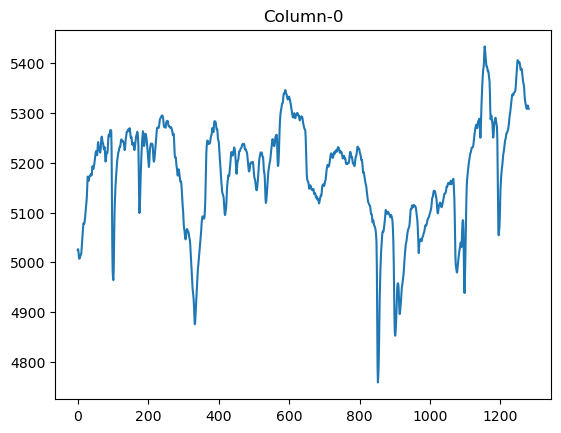

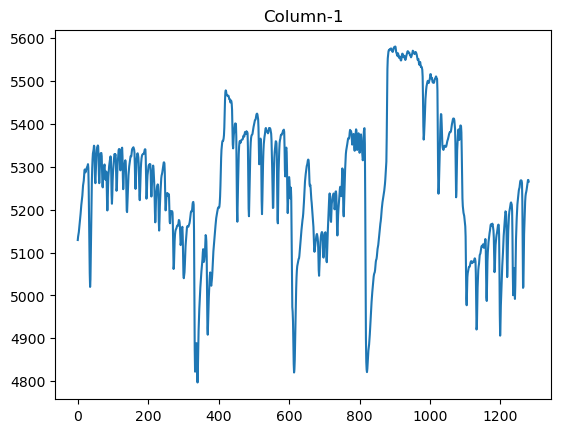

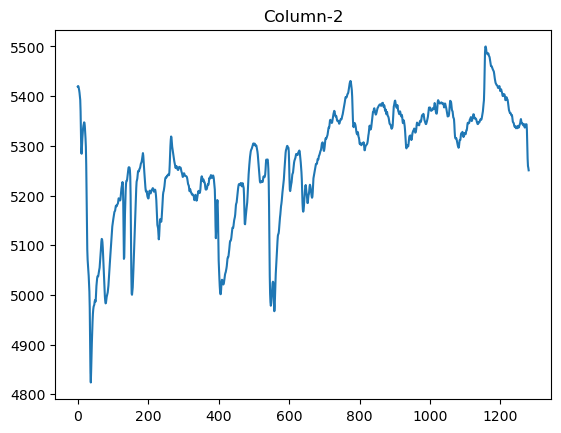

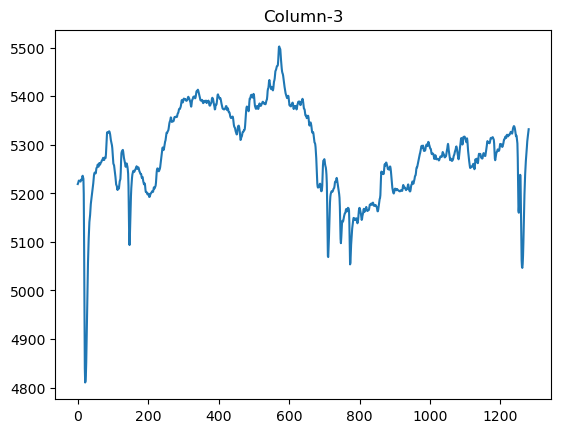

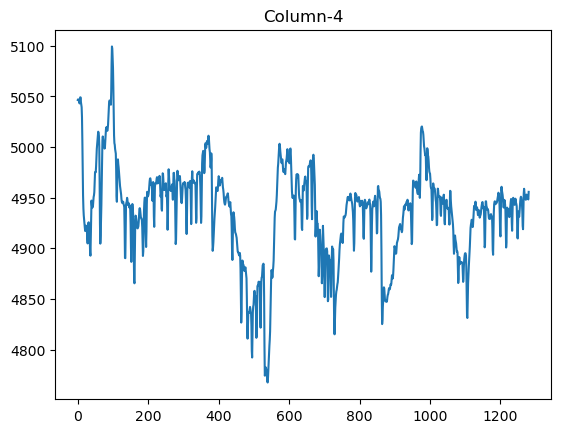

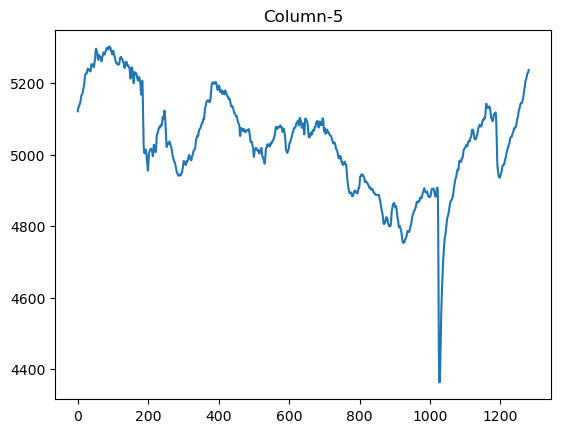

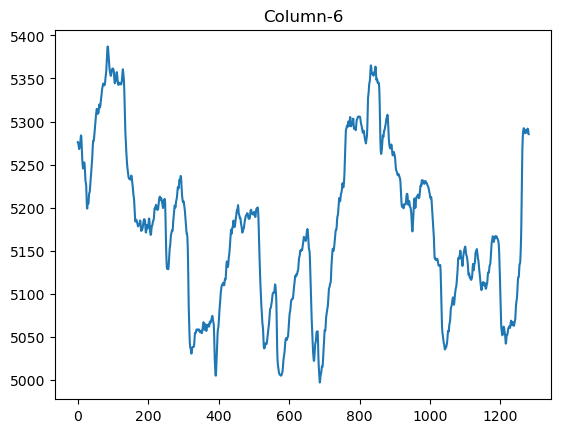

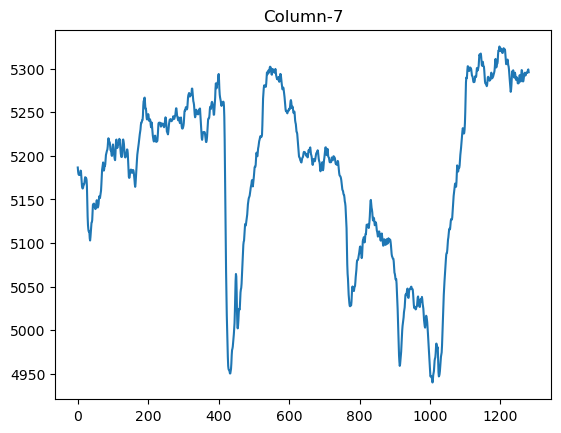

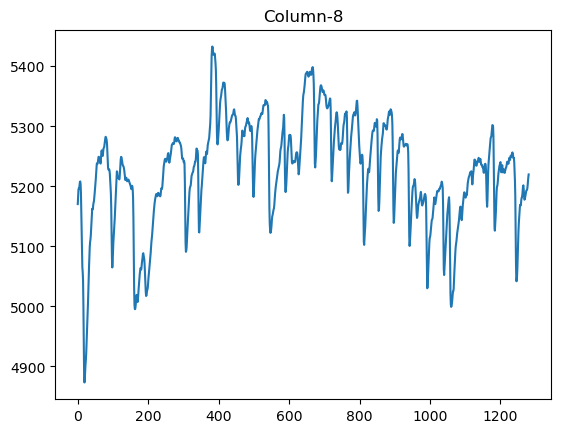

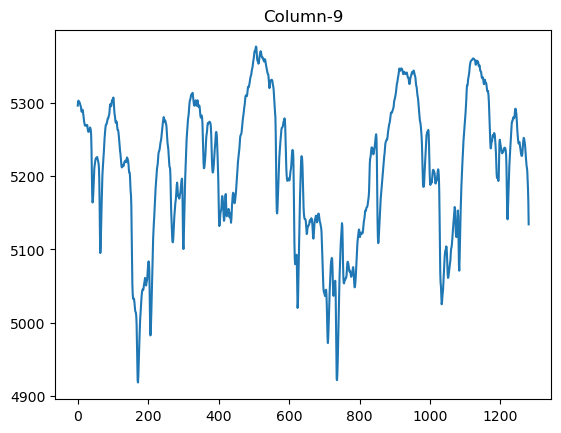

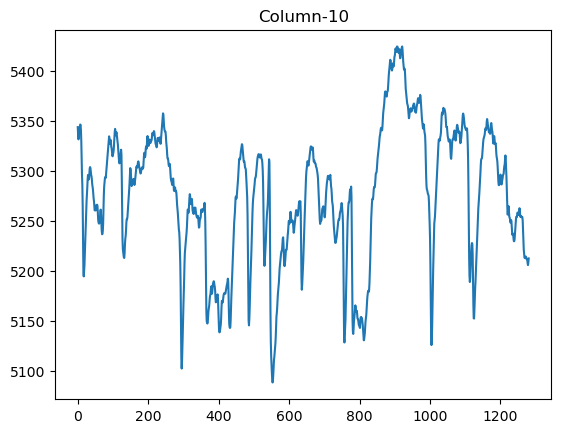

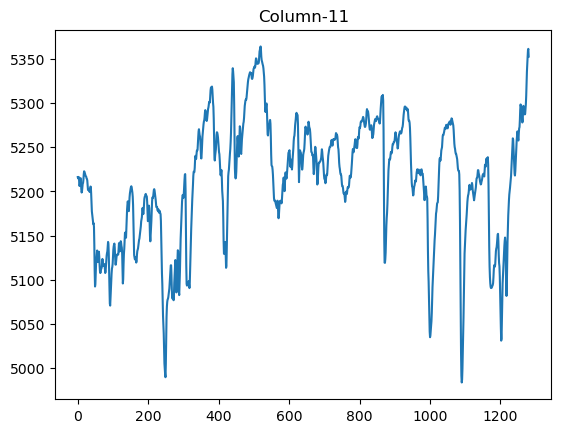

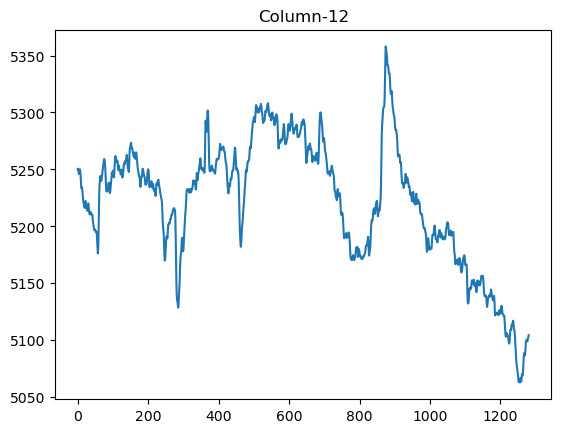

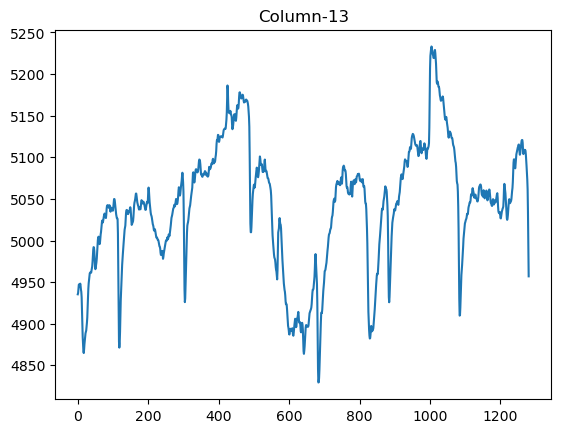

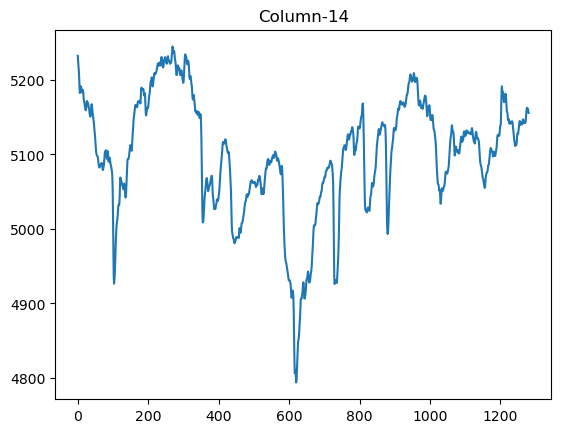

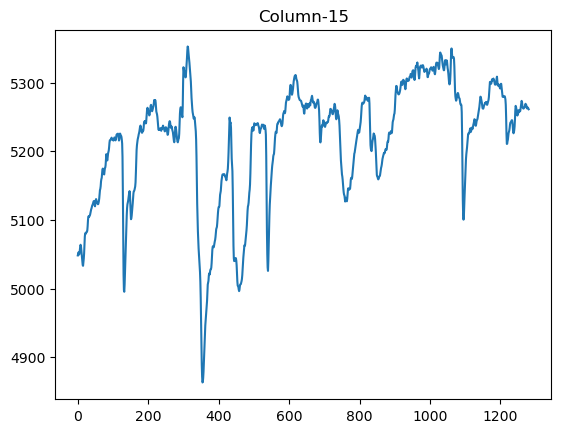

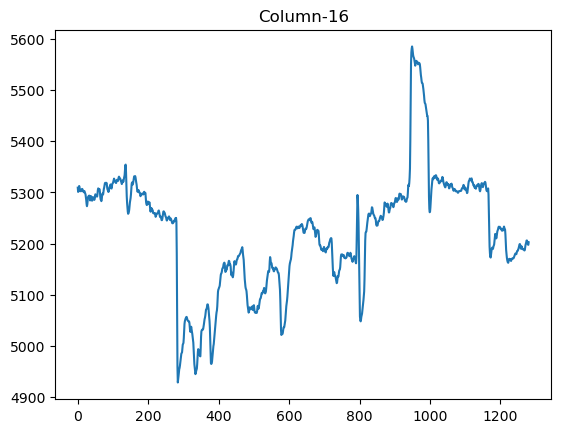

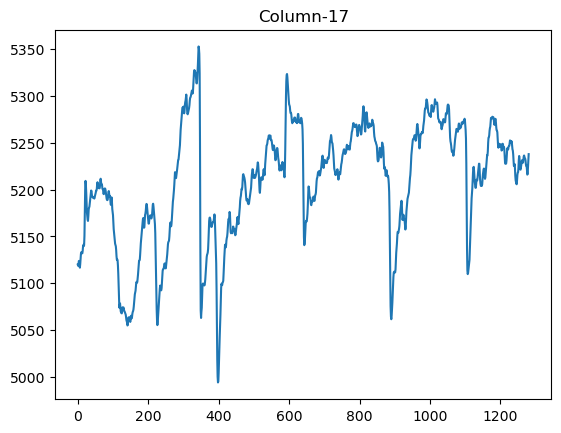

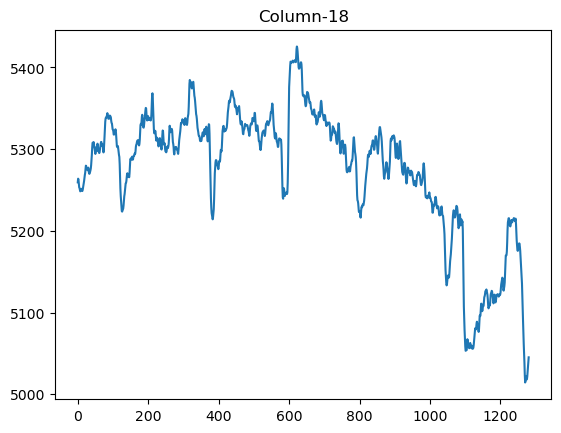

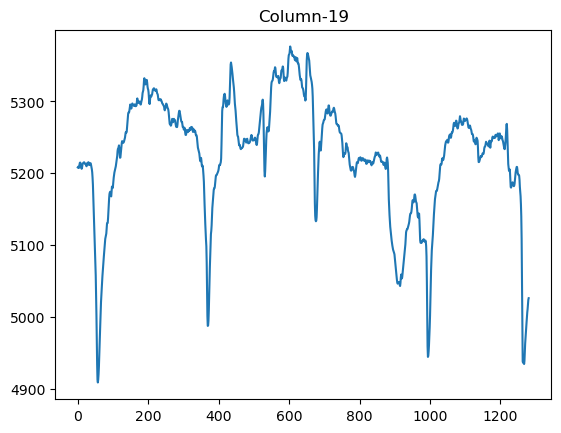

In [12]:
# Filtering Hold F3
for column in hold_hand_filtered.columns:  # Loop melalui kolom-kolom DataFrame
  plt.figure()
  plt.title(f"Column-{column}")  # Display the custom title
  plt.plot(hold_hand_filtered[column])
  plt.show()

In [13]:
# Filtering Open F3
def apply_bandpass_filter(open_f3, lowcut, highcut, fs):
    b, a = butter_bandpass(lowcut, highcut, fs)
    filtered_data = np.zeros_like(open_f3)
    for i, column in enumerate(open_f3.columns):
        data = open_f3[column].values
        filtered_data[:, i] = signal.filtfilt(b, a, data)
    return pd.DataFrame(filtered_data, columns=open_f3.columns)

# Apply the bandpass filter to all columns in the open_f3 dataframe
open_hand_filtered = apply_bandpass_filter(open_f3, lowcut, highcut, fs)
filtered_open_data = pd.DataFrame(open_hand_filtered)
filtered_open_data

0            1            2            3            4   \
0     5146.447356  5219.897190  5349.515166  5555.051875  4846.474306   
1     5149.115231  5187.767444  5350.137929  5550.077006  4836.896229   
2     5148.766392  5168.506427  5352.555836  5543.050590  4830.267515   
3     5148.216114  5164.122705  5354.471913  5538.378717  4816.461038   
4     5146.622184  5160.875719  5354.921359  5539.172088  4798.810868   
...           ...          ...          ...          ...          ...   
1276  5187.068494  5178.087517  5263.893562  5201.048211  5062.473685   
1277  5197.733662  5171.635584  5269.080083  5194.376030  5061.871950   
1278  5207.054293  5164.141419  5270.059400  5177.546073  5057.064538   
1279  5212.013226  5161.734529  5269.256168  5152.418422  5057.078799   
1280  5211.256344  5166.815610  5269.892796  5129.782154  5060.652448   

               5            6            7            8            9   \
0     4984.116052  5197.677117  5176.074120  5372.352906  5161.260738   
1     4985.946154  5198.051362  5178.792116  5372.479392  5115.072334   
2     4987.578827  5197.521906  5188.547508  5374.072521  5065.517324   
3     4989.956935  5198.891588  5208.789558  5375.907995  5028.679588   
4     4992.069981  5203.616251  5225.243175  5376.093093  5016.173603   
...           ...          ...          ...          ...          ...   
1276  5439.082398  5276.455710  5220.354885  4930.160652  5295.824067   
1277  5436.224047  5272.093003  5226.104866  4933.014044  5297.081313   
1278  5433.659768  5269.920542  5232.278272  4933.903426  5300.483207   
1279  5433.652221  5271.728225  5233.495987  4937.767987  5305.957475   
1280  5437.778971  5273.596435  5232.859340  4946.465518  5307.543916   

               10           11           12           13           14  \
0     5244.586161  5118.671823  5313.715866  5138.423000  5153.236969   
1     5253.538502  5121.622772  5311.065784  5139.261885  5157.212422   
2     5262.171321  5126.600963  5308.378747  5137.313580  5160.704179   
3     5265.063720  5132.337678  5310.123625  5134.774740  5163.062883   
4     5261.999560  5137.351577  5314.950075  5130.814814  5164.729663   
...           ...          ...          ...          ...          ...   
1276  5106.241413  5247.965689  5384.728054  5102.138091  5001.113578   
1277  5103.029112  5241.768577  5388.438109  5101.671863  5013.456626   
1278  5065.203209  5224.006994  5394.641790  5102.731848  5026.016613   
1279  4994.137724  5203.654225  5398.156517  5105.186830  5030.283689   
1280  4917.455537  5191.504580  5400.127850  5108.796234  5027.322045   

               15           16           17           18           19  
0     5125.461437  5303.840278  5307.543916  5299.519560  5274.830590  
1     5144.352804  5307.063950  5306.506262  5303.205389  5273.858834  
2     5160.401572  5306.418049  5306.251218  5302.976865  5270.407452  
3     5175.179488  5303.310281  5310.741338  5299.740096  5263.848304  
4     5188.234741  5301.031726  5316.389664  5297.153908  5256.838997  
...           ...          ...          ...          ...          ...  
1276  5154.678928  5213.713836  5287.339217  5208.297989  5295.060605  
1277  5160.867736  5215.243215  5286.138752  5202.218116  5295.598909  
1278  5167.890931  5212.940126  5285.361845  5196.775697  5293.670785  
1279  5176.625614  5210.416869  5283.211946  5191.659469  5290.076170  
1280  5184.715554  5210.638679  5279.768384  5186.566786  5287.792153  

[1281 rows x 20 columns]

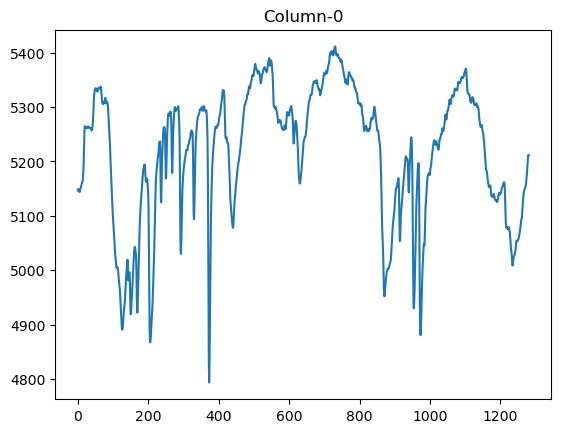

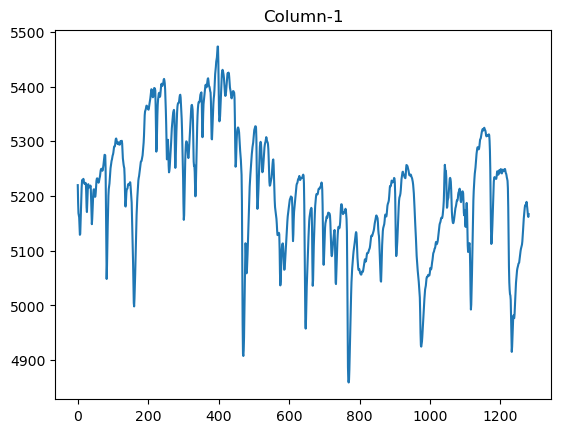

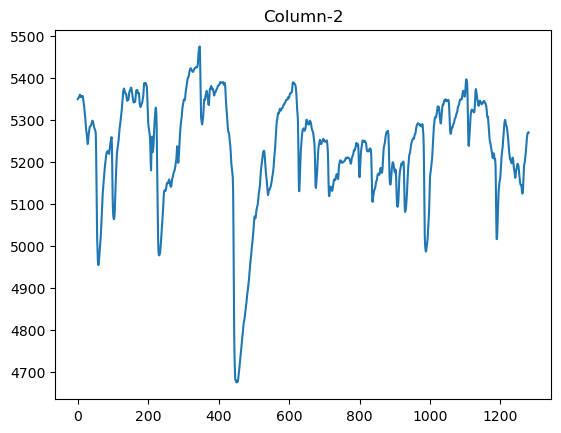

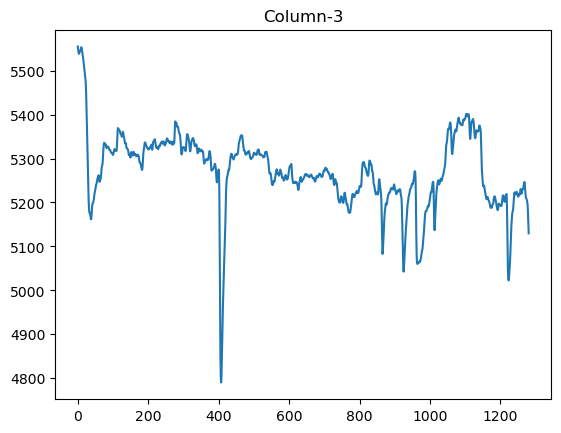

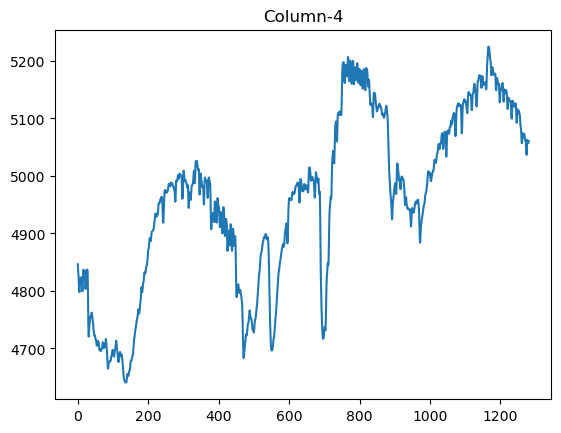

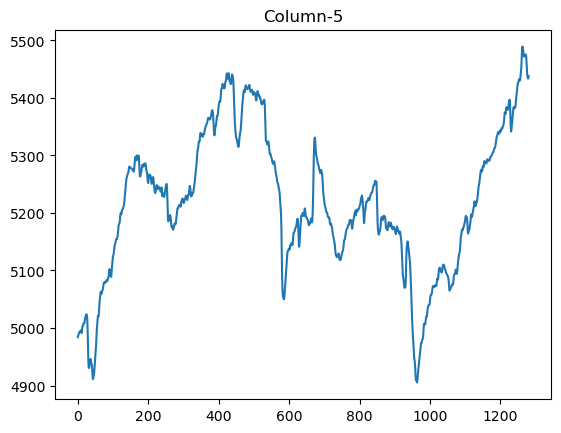

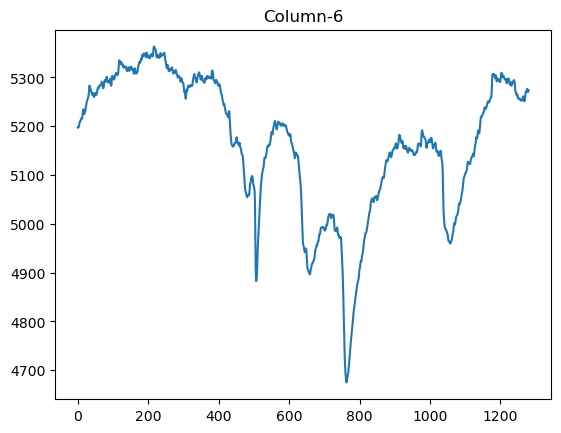

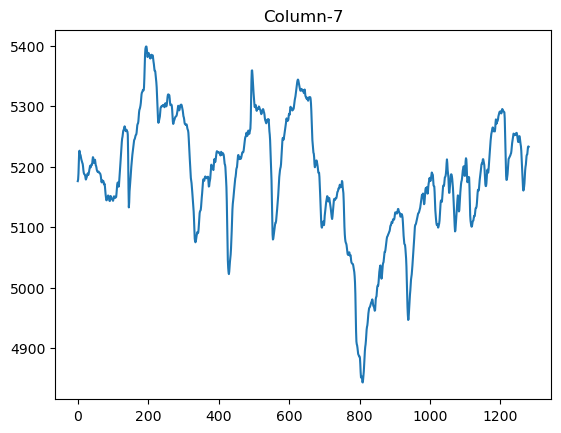

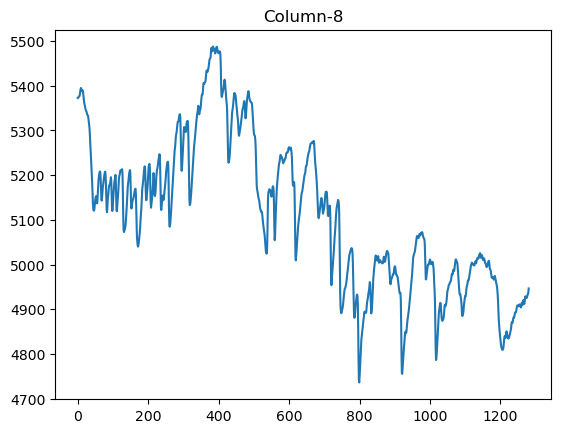

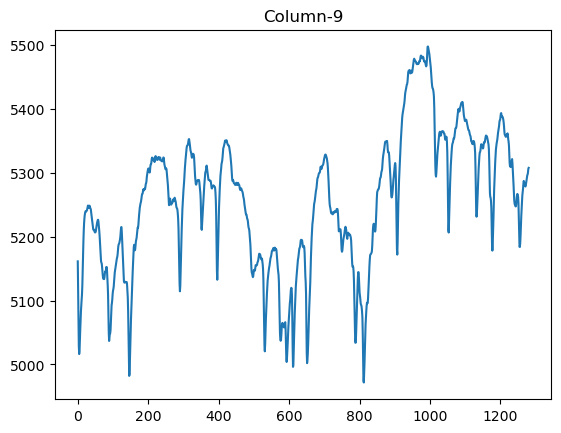

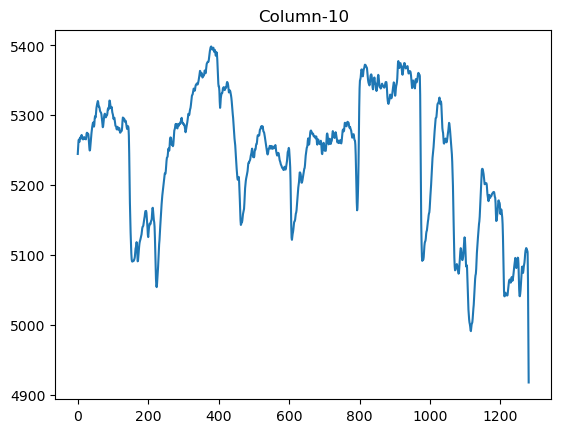

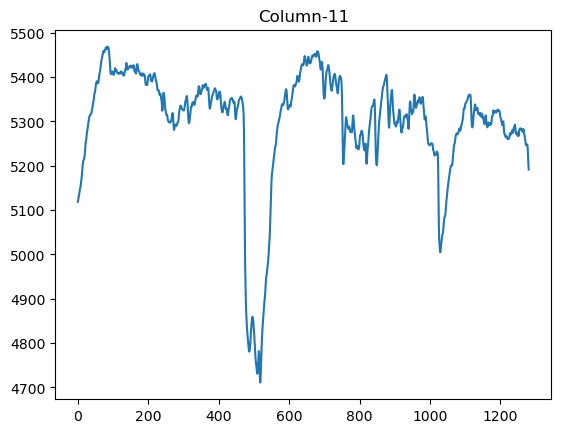

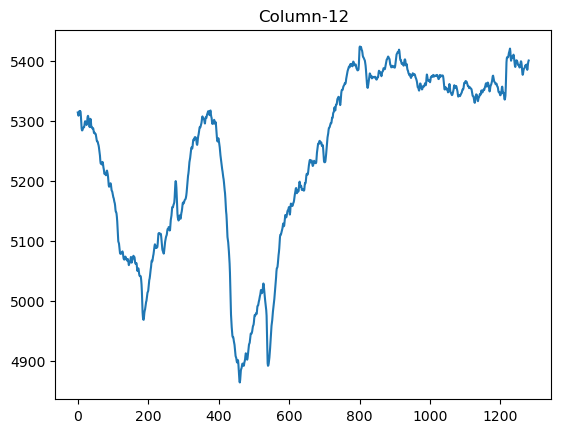

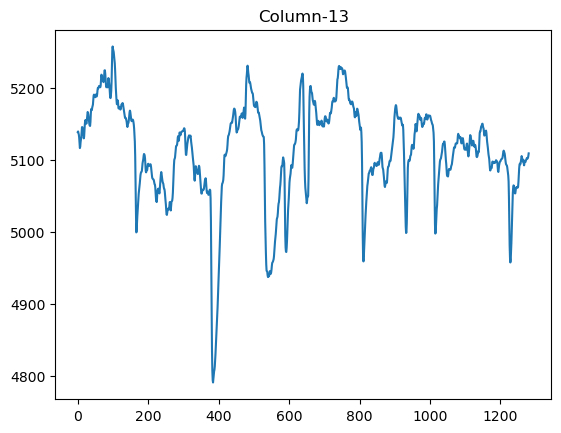

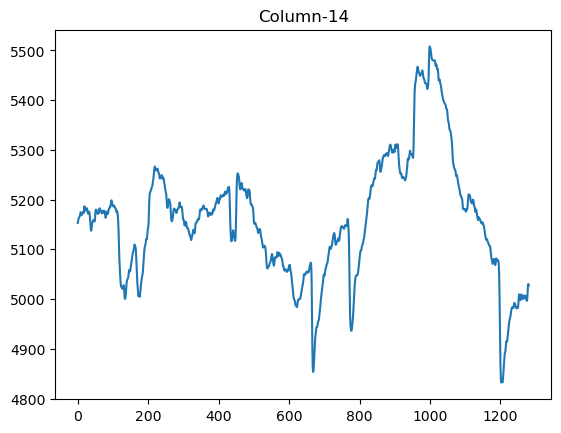

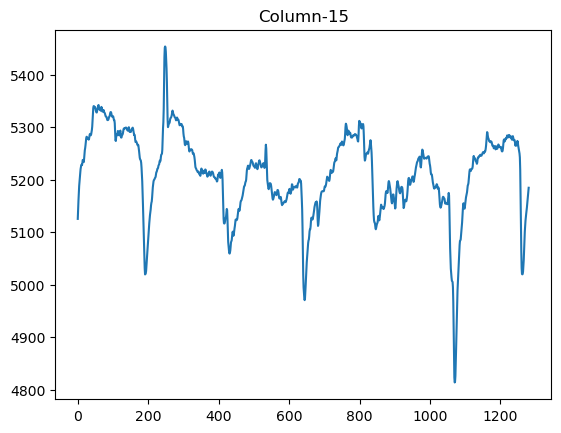

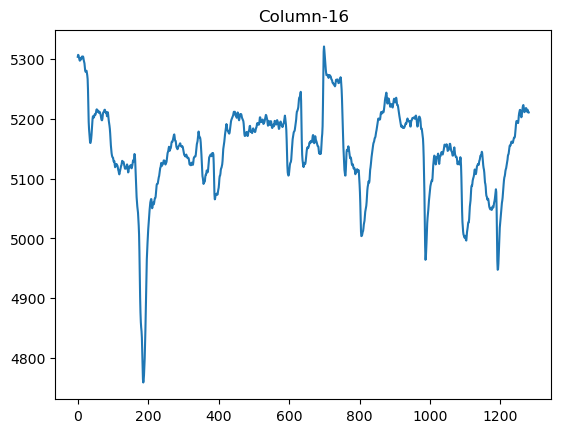

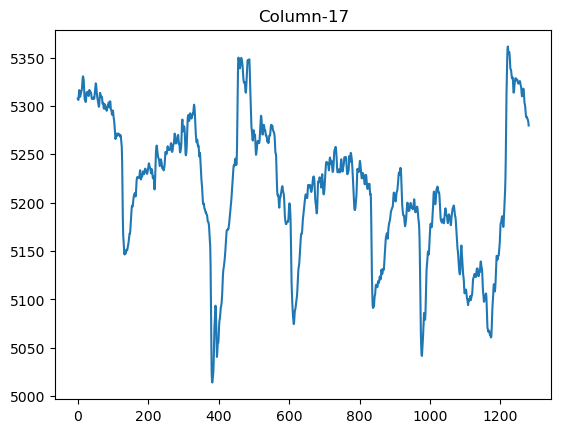

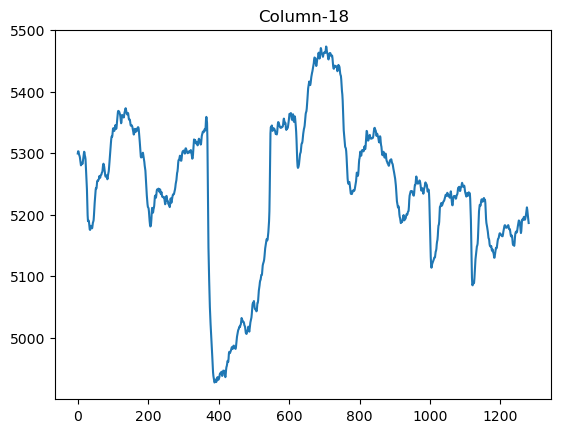

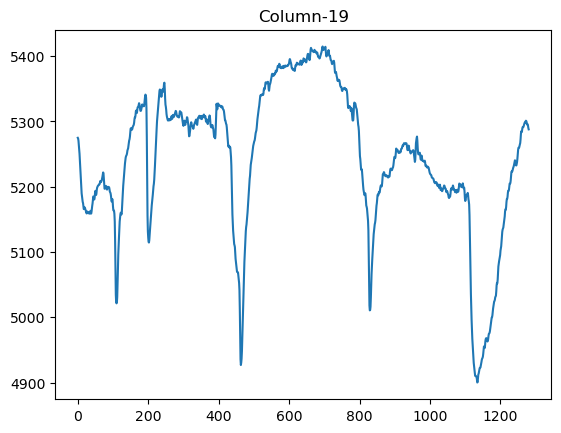

In [14]:
# Filtering Open F3
for column in open_hand_filtered.columns:  # Loop melalui kolom-kolom DataFrame
  plt.figure()
  plt.title(f"Column-{column}")  # Display the custom title
  plt.plot(open_hand_filtered[column])
  plt.show()

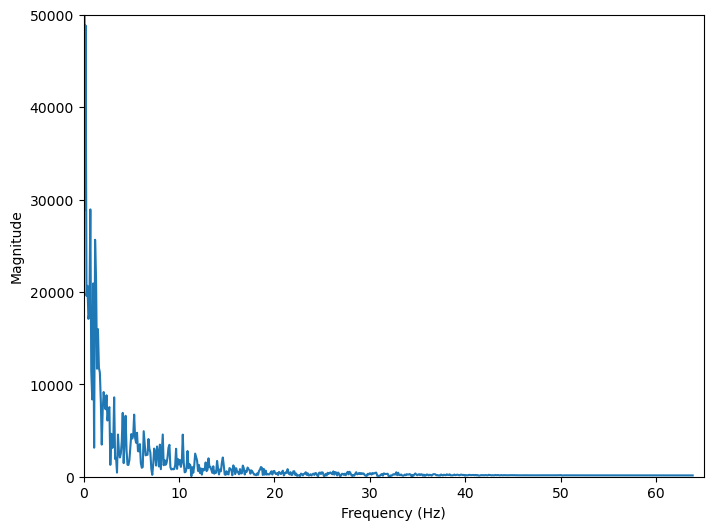

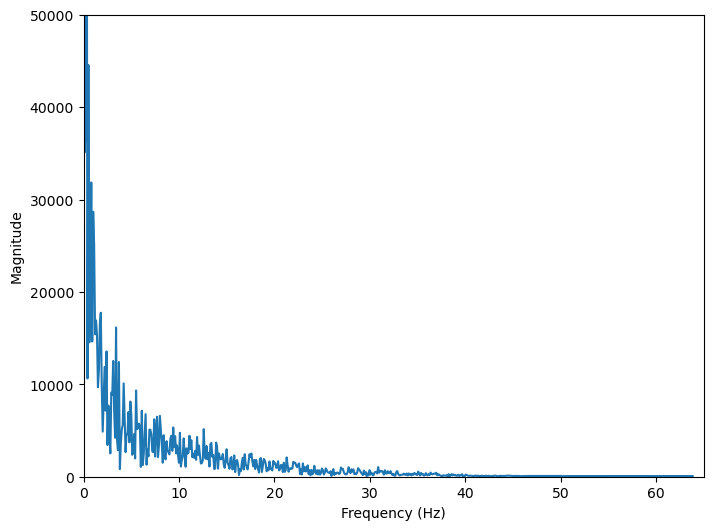

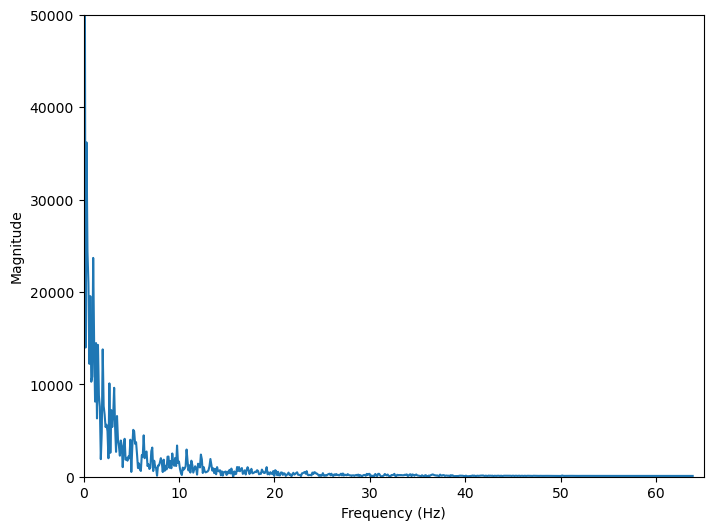

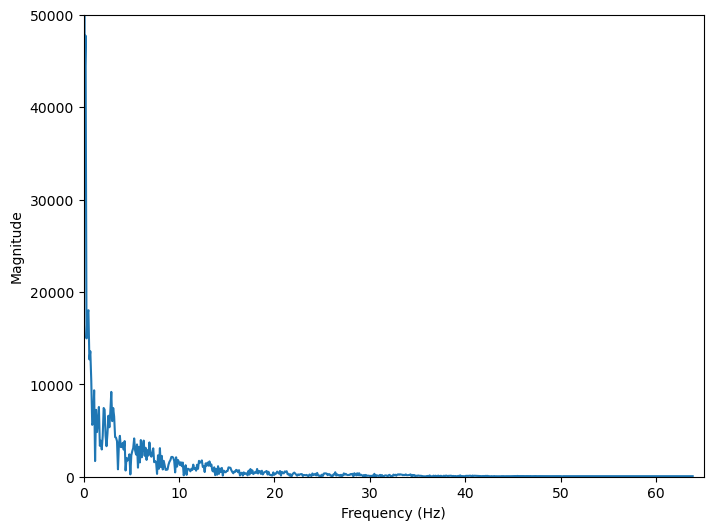

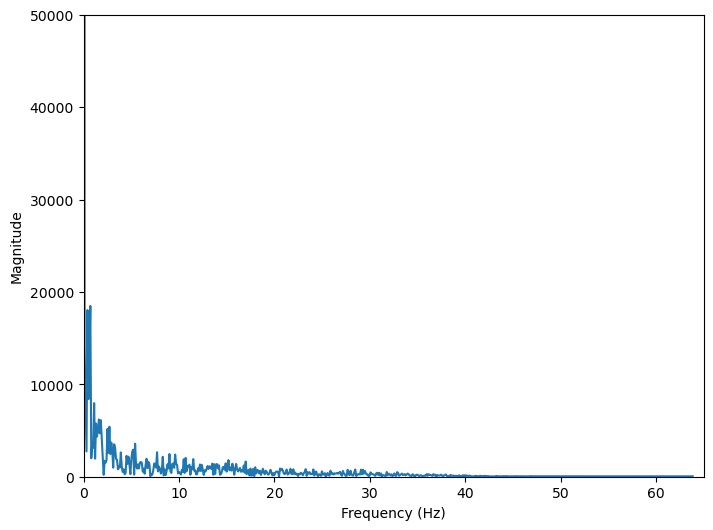

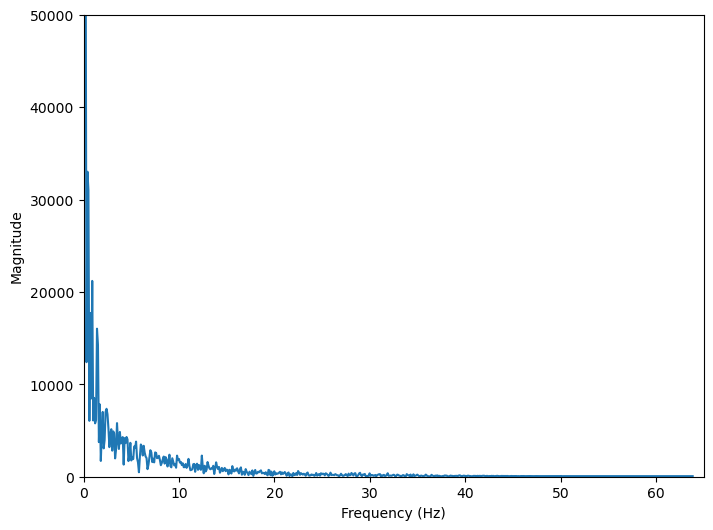

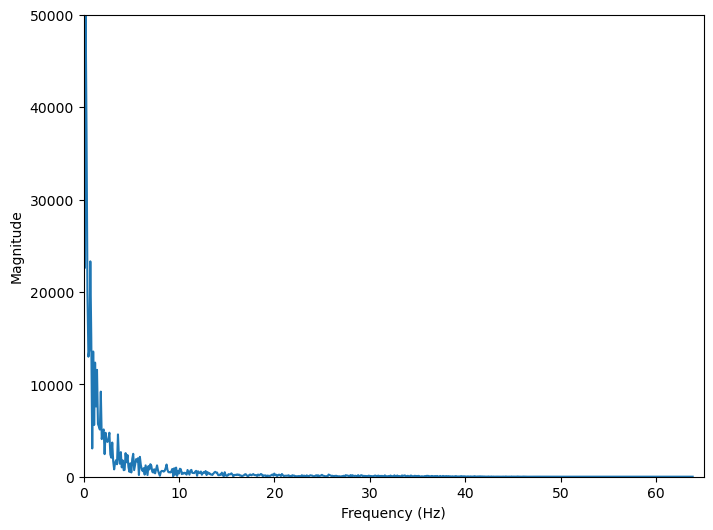

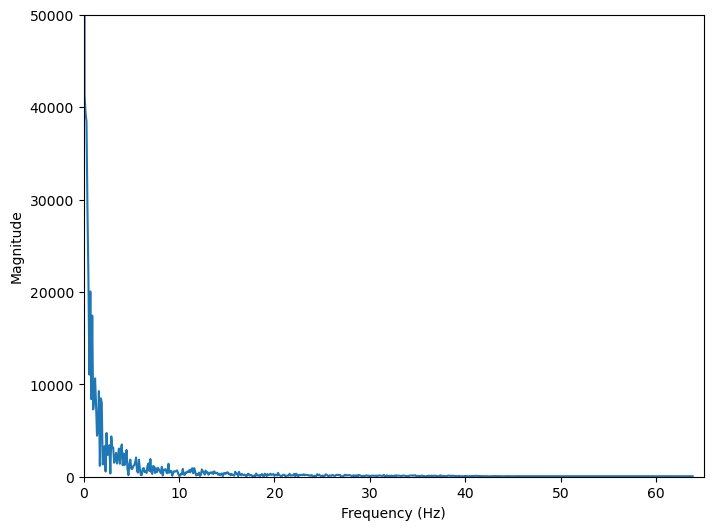

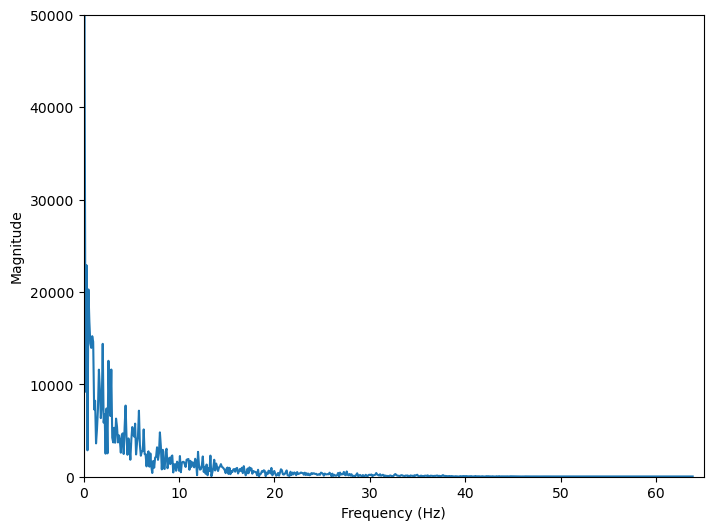

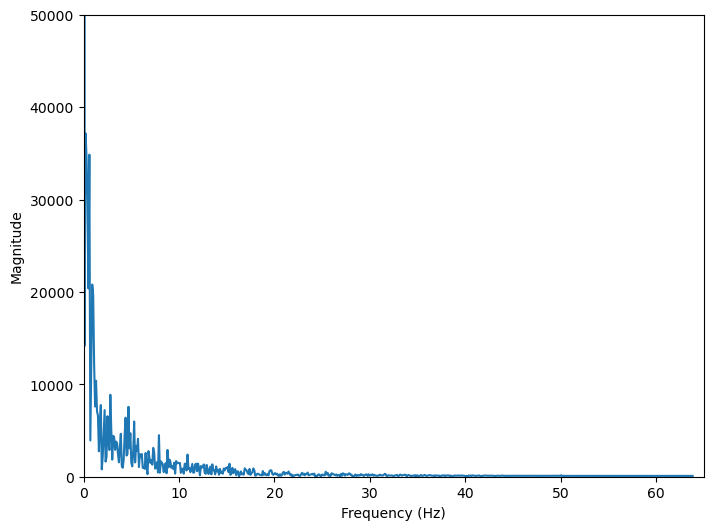

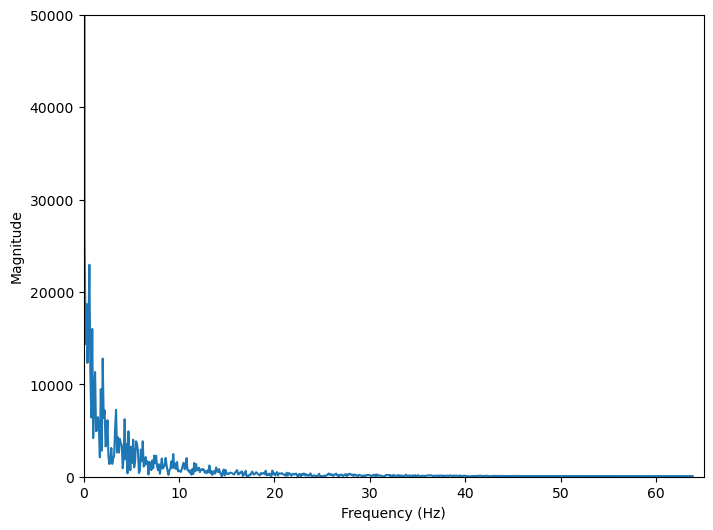

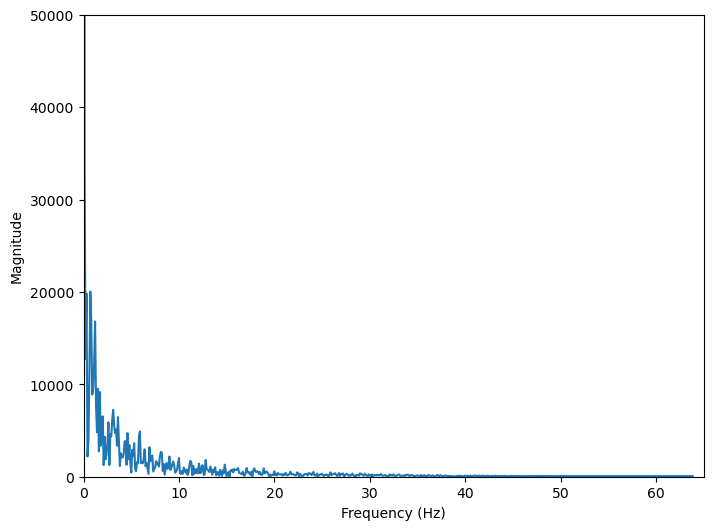

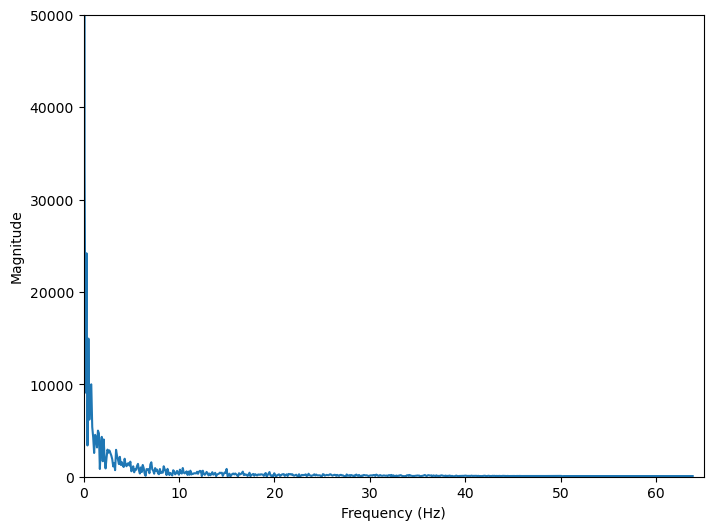

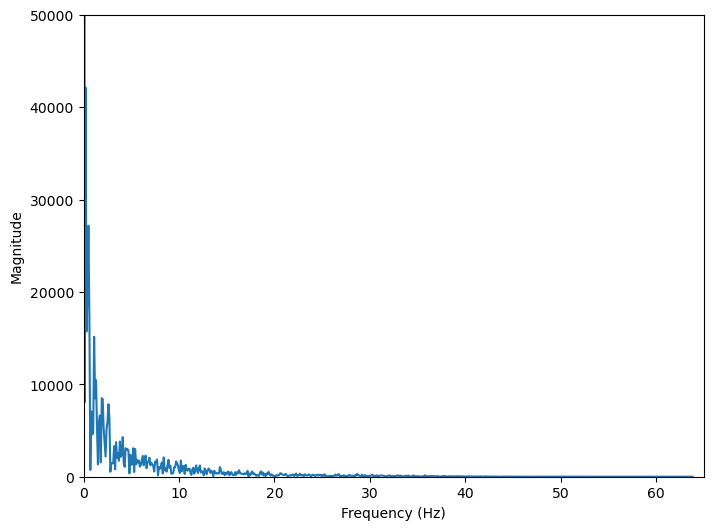

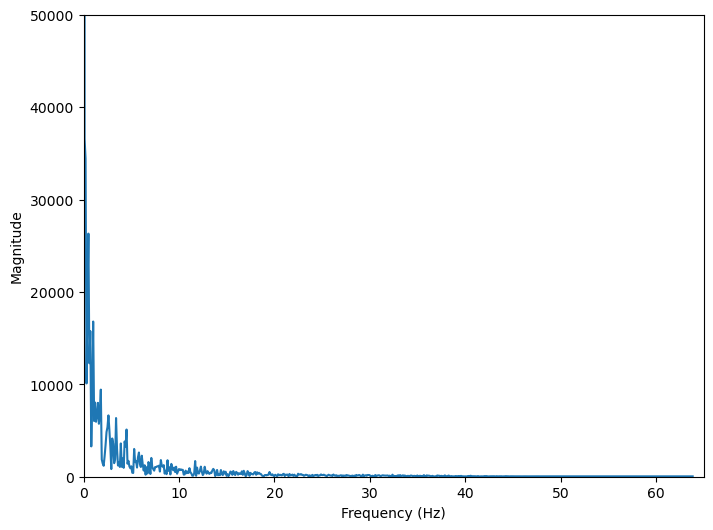

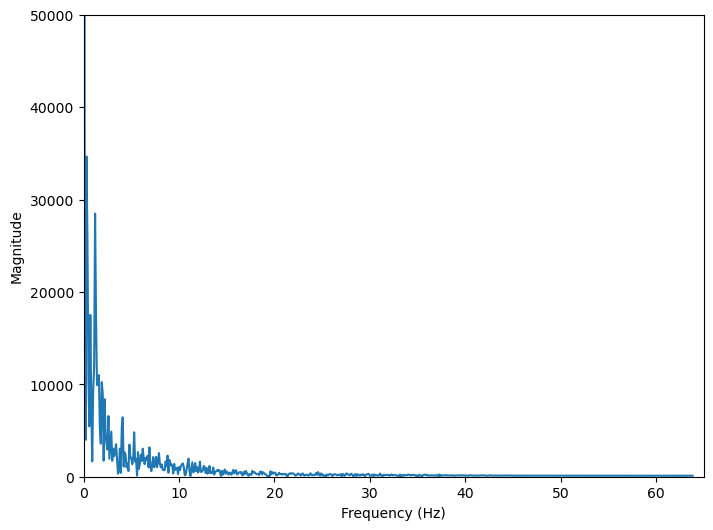

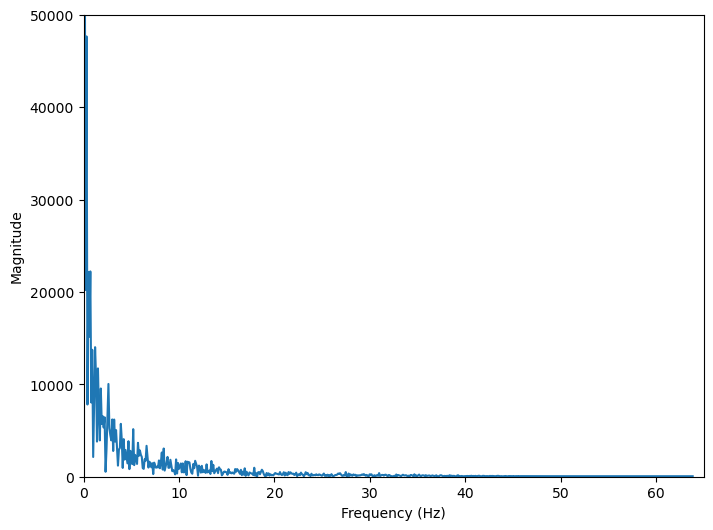

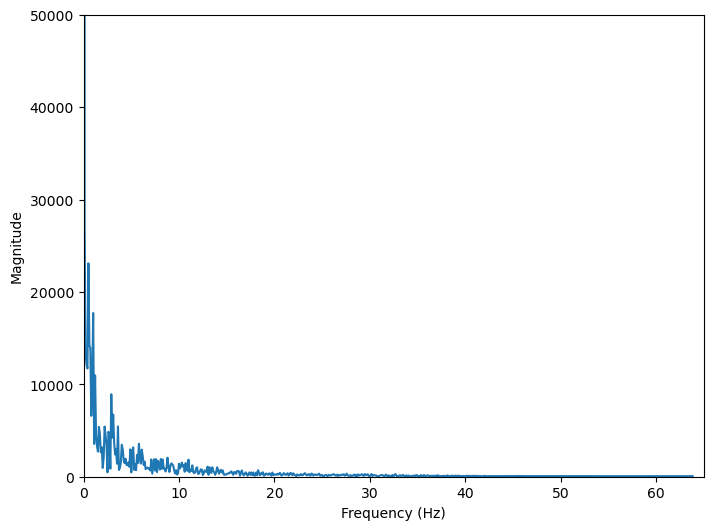

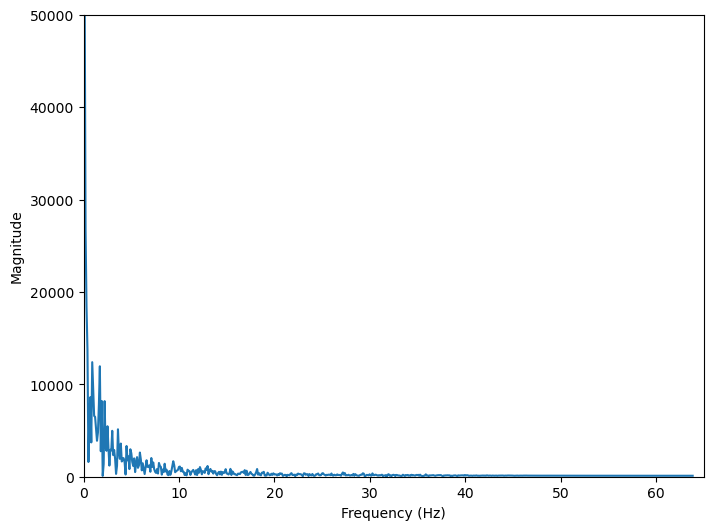

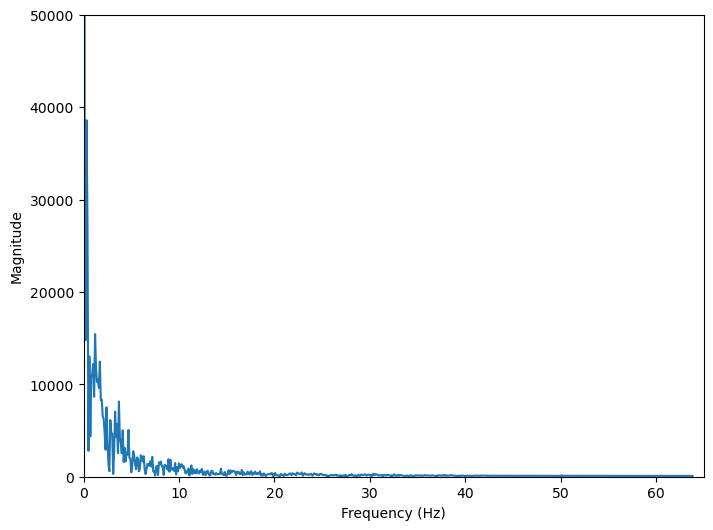

0             1             2             3             4   \
0    6.636300e+06  6.737951e+06  6.747544e+06  6.768863e+06  6.322417e+06   
1    2.890031e+04  3.510311e+04  6.865284e+04  4.249624e+04  1.396632e+04   
2    4.883446e+04  3.773153e+04  1.397937e+04  4.773215e+04  8.307530e+03   
3    1.958175e+04  8.930867e+04  3.618132e+04  1.497246e+04  2.739165e+03   
4    2.065794e+04  1.063432e+04  2.435139e+04  1.762362e+04  1.803777e+04   
..            ...           ...           ...           ...           ...   
635  1.422410e+02  6.939167e+01  8.586760e+01  5.836838e+01  4.221212e+01   
636  1.422363e+02  6.938886e+01  8.586524e+01  5.836579e+01  4.221089e+01   
637  1.422323e+02  6.938746e+01  8.586282e+01  5.836500e+01  4.220963e+01   
638  1.422300e+02  6.938567e+01  8.586164e+01  5.836418e+01  4.220851e+01   
639  1.422282e+02  6.938472e+01  8.586059e+01  5.836338e+01  4.220789e+01   

               5             6             7             8             9   \
0    6.449103e+06  6.629133e+06  6.637294e+06  6.695320e+06  6.673823e+06   
1    8.588998e+04  2.257083e+04  4.124650e+04  4.479839e+04  1.416289e+04   
2    6.388318e+04  5.159552e+04  3.937091e+04  9.201755e+03  3.715874e+04   
3    1.239559e+04  3.754245e+04  3.843926e+04  2.288784e+04  3.462916e+04   
4    3.300974e+04  1.976621e+04  2.887306e+04  2.858991e+03  3.040117e+04   
..            ...           ...           ...           ...           ...   
635  6.127798e+01  4.194410e+00  5.205987e+01  2.898925e+01  8.834635e+01   
636  6.127610e+01  4.194050e+00  5.205773e+01  2.898741e+01  8.834282e+01   
637  6.127435e+01  4.194628e+00  5.205655e+01  2.898705e+01  8.834089e+01   
638  6.127336e+01  4.194052e+00  5.205631e+01  2.898658e+01  8.833891e+01   
639  6.127283e+01  4.194010e+00  5.205558e+01  2.898628e+01  8.833786e+01   

               10            11            12            13            14  \
0    6.757264e+06  6.676565e+06  6.688746e+06  6.458250e+06  6.533107e+06   
1    2.573191e+04  3.273695e+04  3.337751e+04  8.040925e+03  3.655462e+04   
2    1.436479e+04  1.275797e+04  9.106575e+03  4.211172e+04  3.442374e+04   
3    1.870987e+04  1.981819e+04  2.418237e+04  1.572301e+04  1.009368e+04   
4    1.231980e+04  2.190517e+03  3.384236e+03  1.969148e+04  1.927697e+04   
..            ...           ...           ...           ...           ...   
635  6.677375e+01  6.422973e+01  7.153493e+01  2.889052e+00  3.973120e+01   
636  6.677290e+01  6.422727e+01  7.153240e+01  2.887966e+00  3.972817e+01   
637  6.677151e+01  6.422630e+01  7.153072e+01  2.886791e+00  3.972837e+01   
638  6.676976e+01  6.422577e+01  7.152983e+01  2.886480e+00  3.972743e+01   
639  6.676904e+01  6.422478e+01  7.152888e+01  2.885759e+00  3.972699e+01   

               15            16            17            18            19  
0    6.683776e+06  6.691407e+06  6.671431e+06  6.756407e+06  6.695311e+06  
1    3.773879e+04  6.924294e+04  2.705638e+04  5.410361e+04  3.399721e+04  
2    3.983278e+03  2.020839e+04  1.332913e+04  2.665561e+04  1.477590e+04  
3    3.465779e+04  4.765370e+04  1.213243e+04  1.843544e+04  3.857719e+04  
4    2.524337e+04  7.815398e+03  1.171590e+04  1.371440e+04  2.774433e+04  
..            ...           ...           ...           ...           ...  
635  1.067004e+02  5.419436e+01  6.033364e+01  1.041212e+02  9.061426e+01  
636  1.066974e+02  5.419323e+01  6.033191e+01  1.041170e+02  9.061270e+01  
637  1.066951e+02  5.419151e+01  6.033060e+01  1.041150e+02  9.060989e+01  
638  1.066929e+02  5.419032e+01  6.032922e+01  1.041128e+02  9.060873e+01  
639  1.066918e+02  5.418976e+01  6.032851e+01  1.041116e+02  9.060750e+01  

[640 rows x 20 columns]

In [15]:
# Compute FFT for each column in hold_f3_filtered dataframe
fft_data = np.fft.fft(hold_hand_filtered.values, axis=0)
fft_freq = np.fft.fftfreq(hold_hand_filtered.shape[0], 1/fs)
fft_hold_df = pd.DataFrame(columns=hold_hand_filtered.columns, index=fft_freq[:hold_hand_filtered.shape[0]//2])

# Plot FFT for each column
for i, column in enumerate(hold_hand_filtered.columns):
  fig, ax=plt.subplots(figsize=(8,6))
  fft_hold_df[column] = np.abs(fft_data[:hold_hand_filtered.shape[0]//2, i])
  ax.plot(fft_hold_df[column])
  ax.set_xlabel('Frequency (Hz)')
  ax.set_ylabel('Magnitude')
  ax.set_xlim([0,65])
  ax.set_ylim([0,50000])
  plt.show()

fft_hold_df
fft_hold_indexing = fft_hold_df.reset_index(drop = True)
fft_hold_indexing

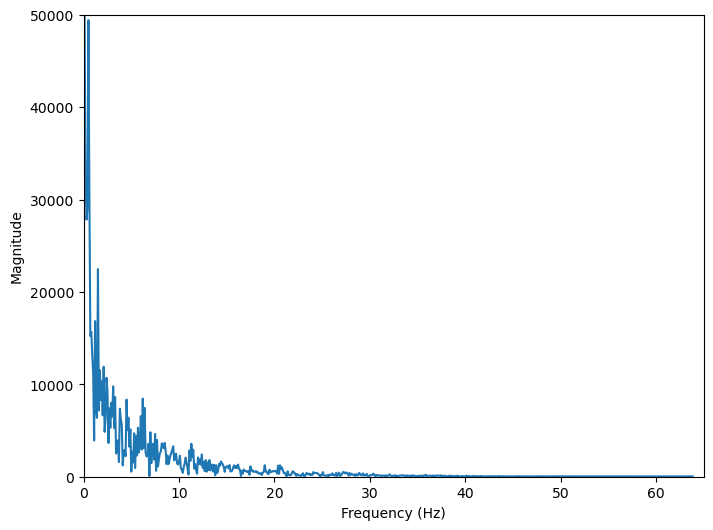

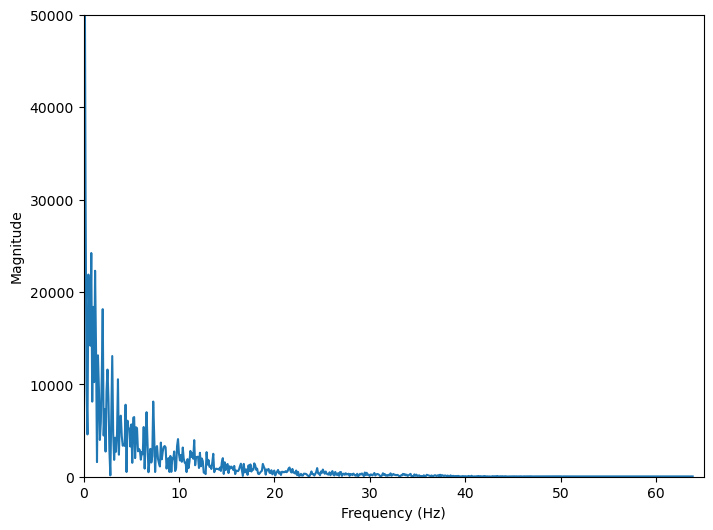

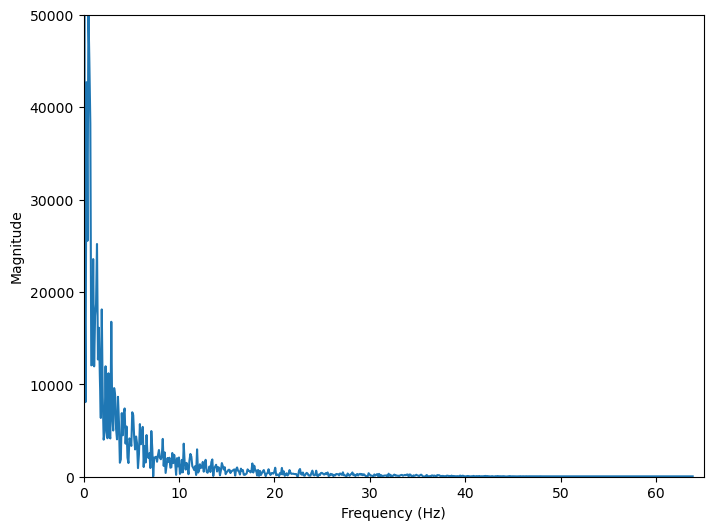

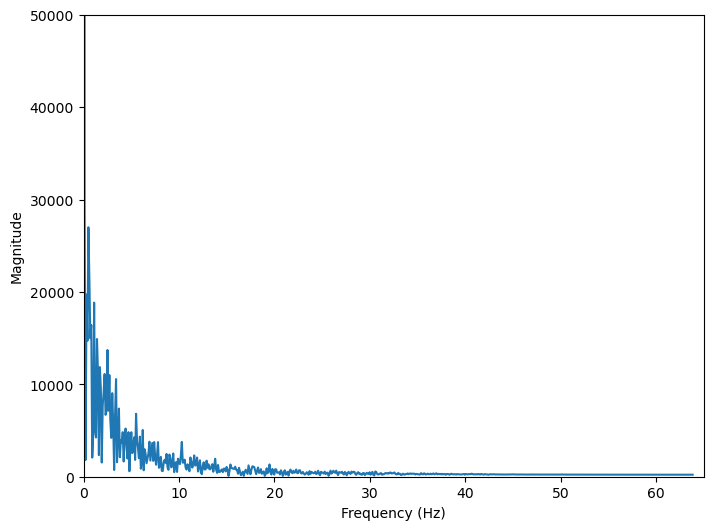

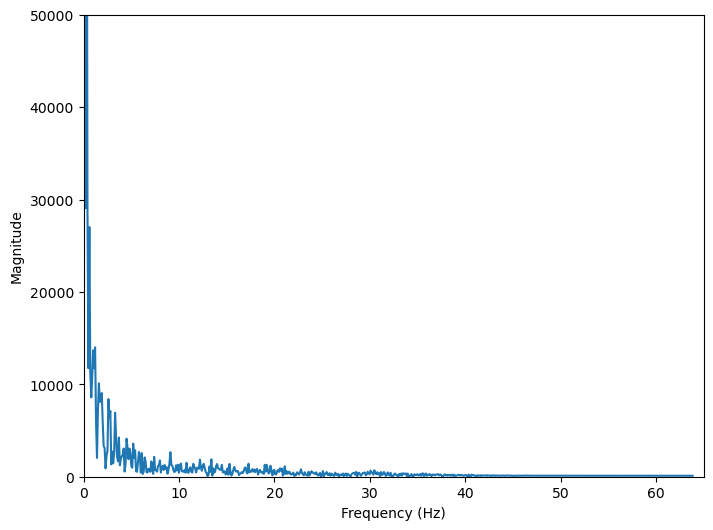

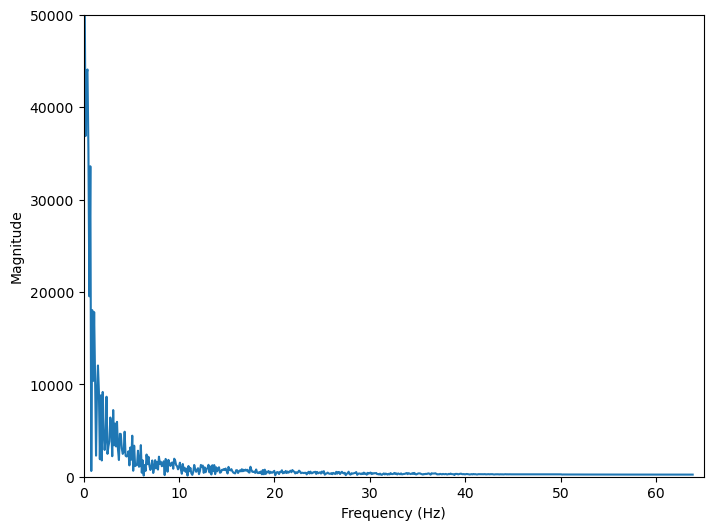

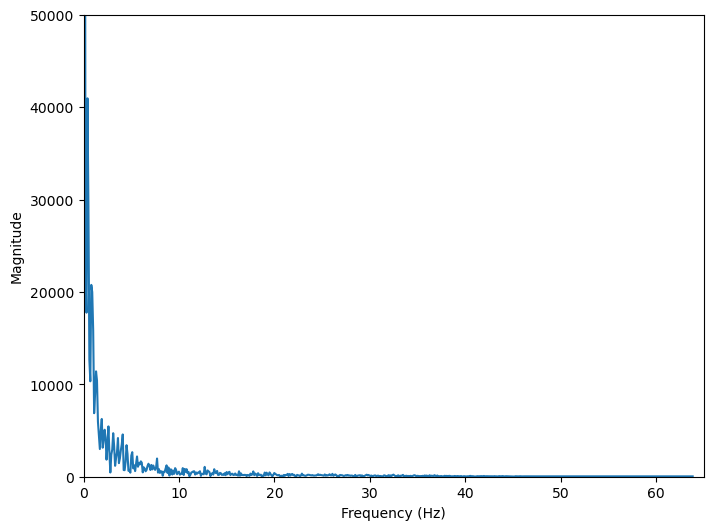

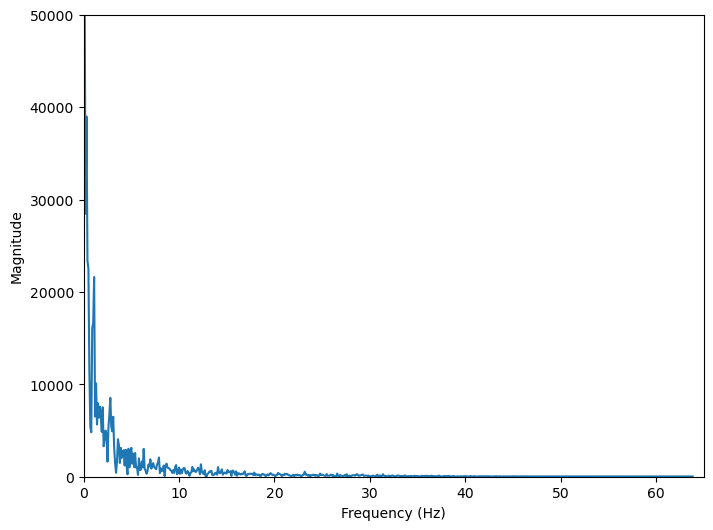

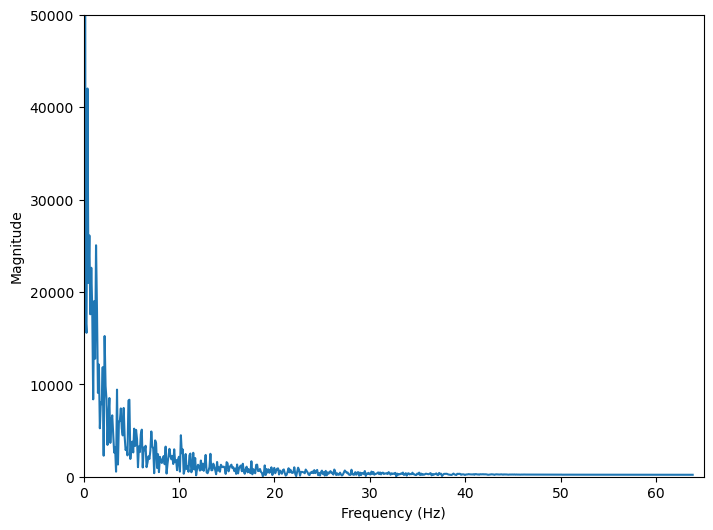

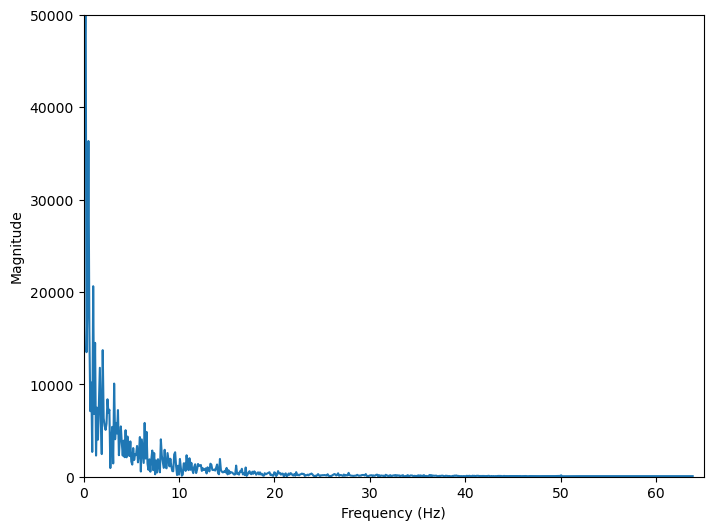

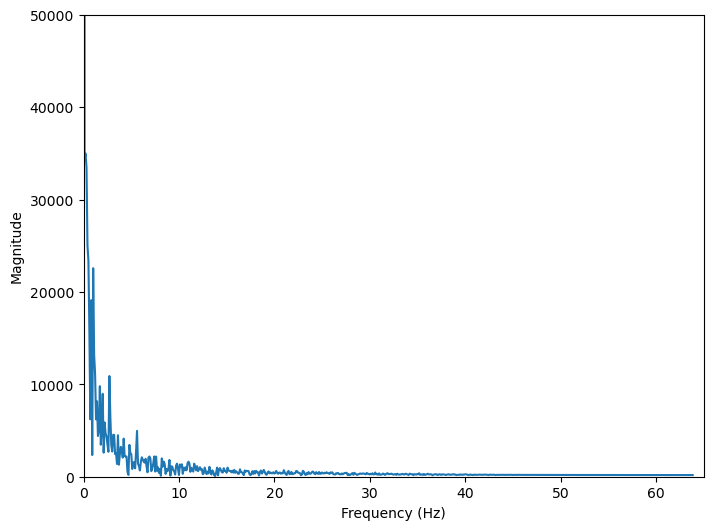

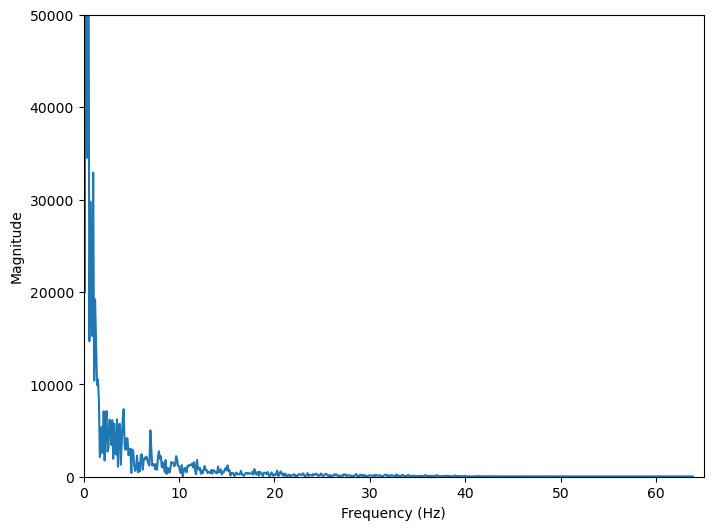

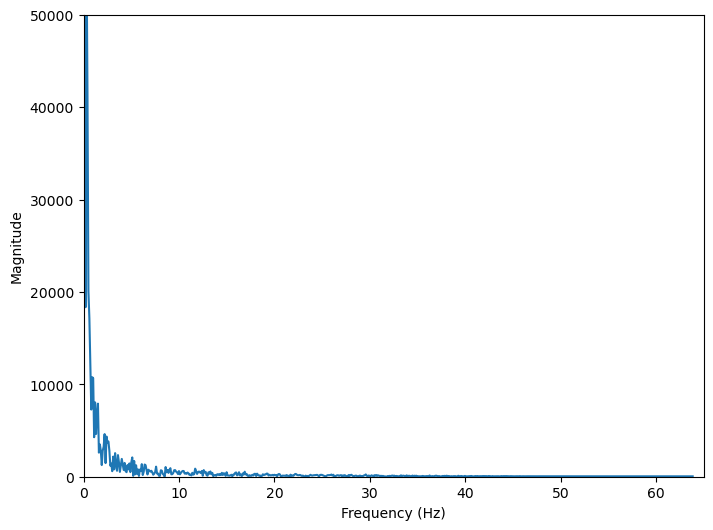

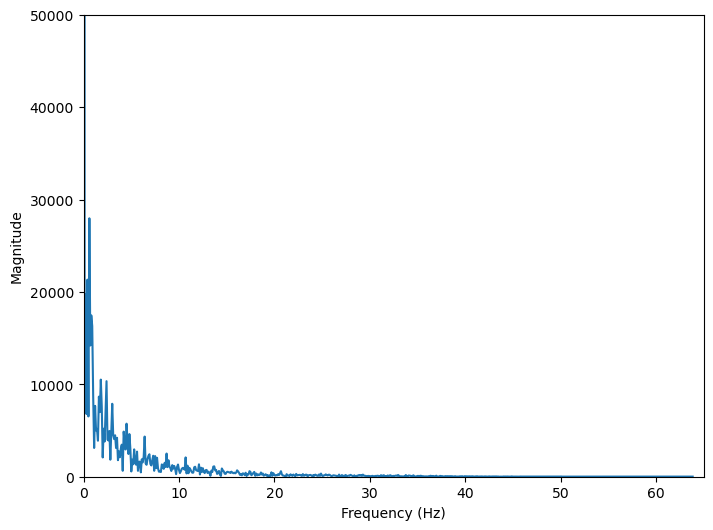

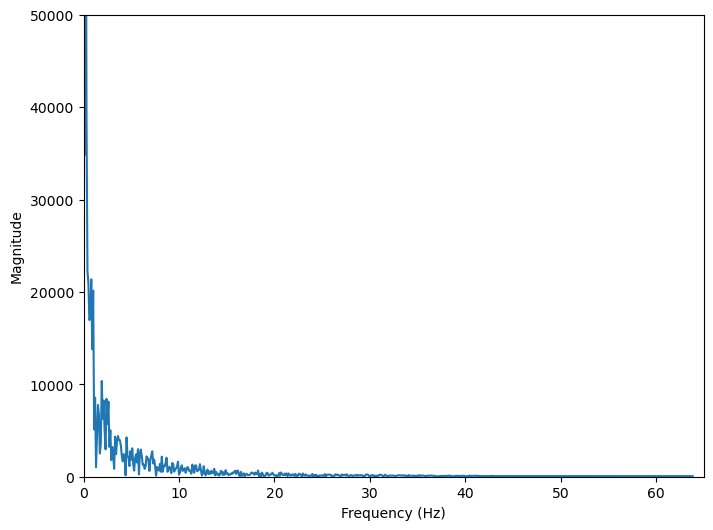

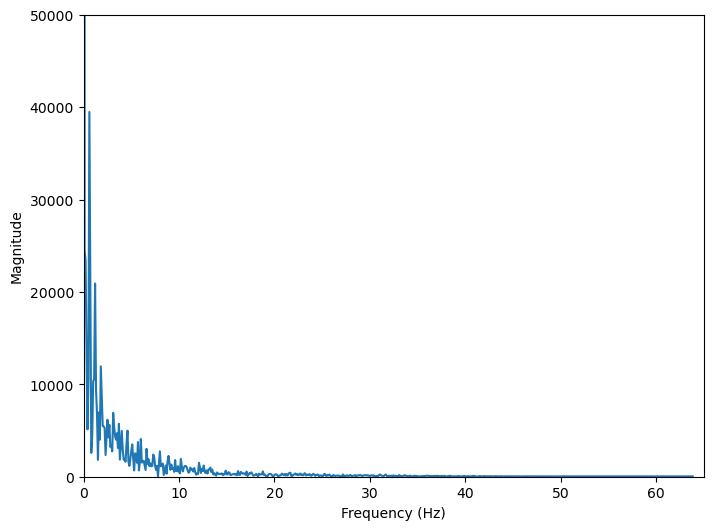

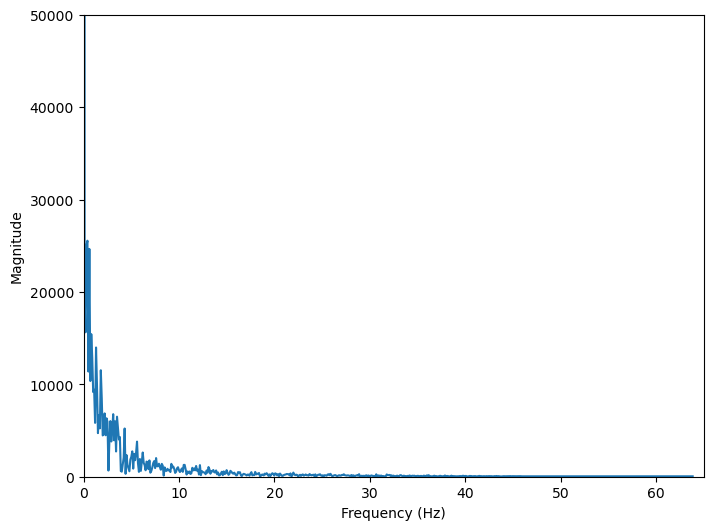

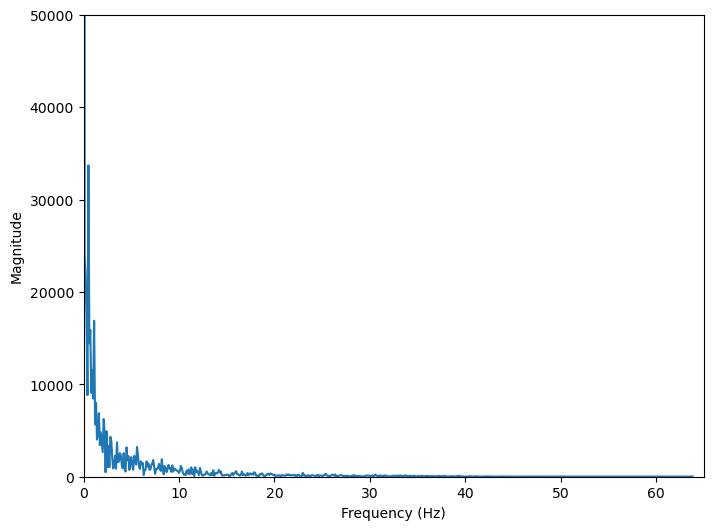

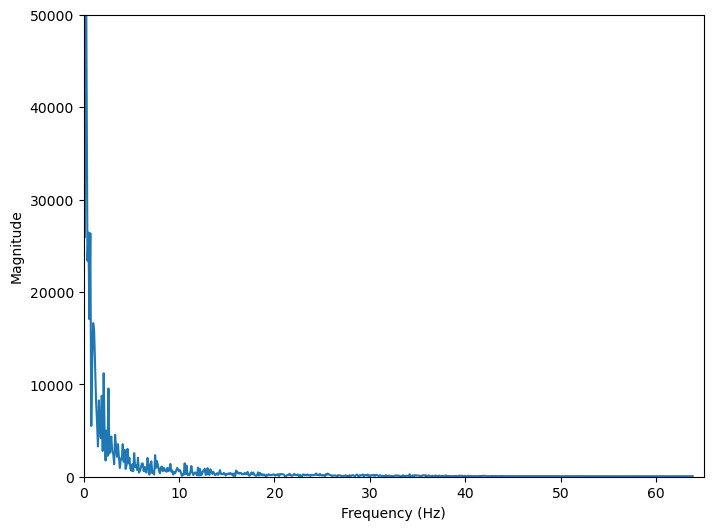

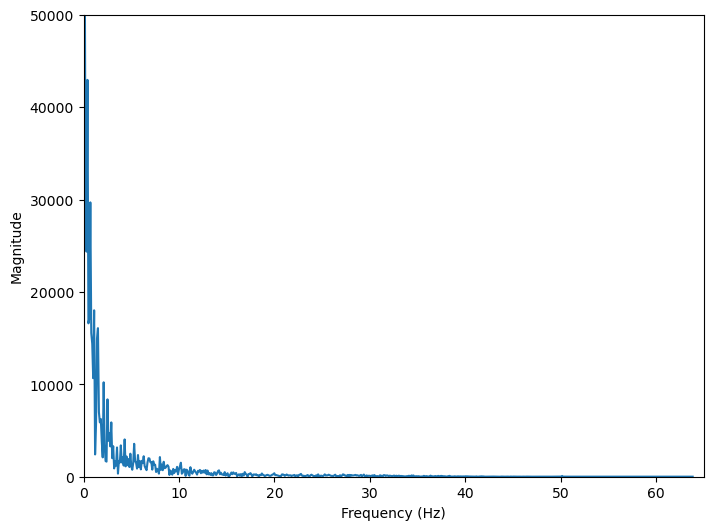

0             1             2             3             4   \
0    6.684979e+06  6.673099e+06  6.703452e+06  6.751660e+06  6.353610e+06   
1    4.878734e+04  6.132208e+04  2.180570e+04  2.881542e+04  7.886387e+04   
2    3.225872e+04  3.066466e+04  8.079470e+03  1.809973e+03  2.907226e+04   
3    2.782172e+04  9.780048e+03  4.269451e+04  1.972497e+04  9.202859e+04   
4    2.921642e+04  4.577004e+03  2.552968e+04  1.472075e+04  2.891343e+04   
..            ...           ...           ...           ...           ...   
635  3.286435e+01  3.356942e+01  3.950762e+01  2.183498e+02  1.050151e+02   
636  3.286273e+01  3.356681e+01  3.950509e+01  2.183448e+02  1.050135e+02   
637  3.286155e+01  3.356612e+01  3.950333e+01  2.183392e+02  1.050103e+02   
638  3.286145e+01  3.356534e+01  3.950275e+01  2.183352e+02  1.050084e+02   
639  3.286085e+01  3.356496e+01  3.950226e+01  2.183328e+02  1.050073e+02   

               5             6             7             8             9   \
0    6.684377e+06  6.619395e+06  6.641050e+06  6.545692e+06  6.731540e+06   
1    5.353854e+04  1.056872e+05  5.396618e+04  1.230759e+05  4.170276e+04   
2    3.687041e+04  2.135241e+04  2.846049e+04  1.724688e+04  5.775082e+04   
3    4.357535e+04  1.775309e+04  3.898811e+04  1.557223e+04  1.347905e+04   
4    4.407405e+04  4.095236e+04  2.339006e+04  4.201416e+04  1.850360e+04   
..            ...           ...           ...           ...           ...   
635  2.288398e+02  3.845772e+01  2.883875e+01  2.104443e+02  6.213639e+01   
636  2.288327e+02  3.845676e+01  2.883866e+01  2.104384e+02  6.213411e+01   
637  2.288278e+02  3.845586e+01  2.883746e+01  2.104331e+02  6.213322e+01   
638  2.288234e+02  3.845532e+01  2.883642e+01  2.104293e+02  6.213141e+01   
639  2.288207e+02  3.845469e+01  2.883615e+01  2.104265e+02  6.213068e+01   

               10            11            12            13            14  \
0    6.715155e+06  6.789265e+06  6.713466e+06  6.550008e+06  6.609654e+06   
1    3.439127e+04  1.991079e+04  1.047562e+05  1.055329e+04  3.481544e+04   
2    3.497125e+04  5.570761e+04  1.834590e+04  1.975754e+04  8.019926e+04   
3    3.346855e+04  3.596177e+04  5.731249e+04  6.785529e+03  3.888029e+04   
4    2.501053e+04  3.450731e+04  4.157100e+04  2.132816e+04  2.221830e+04   
..            ...           ...           ...           ...           ...   
635  1.798990e+02  3.513176e+01  4.326734e+01  1.315644e+01  6.325174e+01   
636  1.798931e+02  3.512936e+01  4.326537e+01  1.315679e+01  6.324850e+01   
637  1.798895e+02  3.512865e+01  4.326422e+01  1.315627e+01  6.324597e+01   
638  1.798864e+02  3.512734e+01  4.326374e+01  1.315575e+01  6.324587e+01   
639  1.798843e+02  3.512680e+01  4.326311e+01  1.315571e+01  6.324486e+01   

               15            16            17            18            19  
0    6.677508e+06  6.595796e+06  6.679990e+06  6.713161e+06  6.717636e+06  
1    2.453769e+04  1.919289e+04  2.391329e+04  2.589755e+04  6.109766e+04  
2    2.344656e+04  1.563263e+04  2.206997e+04  7.129059e+04  2.983384e+04  
3    1.379389e+04  2.508141e+04  1.731525e+04  4.497296e+04  2.436034e+04  
4    5.125299e+03  2.554091e+04  8.830027e+03  2.338242e+04  4.294962e+04  
..            ...           ...           ...           ...           ...  
635  3.652642e+01  4.511769e+01  1.487692e+01  5.645402e+01  6.044702e+00  
636  3.652566e+01  4.511587e+01  1.487786e+01  5.645299e+01  6.044311e+00  
637  3.652517e+01  4.511479e+01  1.487739e+01  5.645194e+01  6.044423e+00  
638  3.652423e+01  4.511380e+01  1.487754e+01  5.645065e+01  6.044645e+00  
639  3.652358e+01  4.511350e+01  1.487715e+01  5.645015e+01  6.044383e+00  

[640 rows x 20 columns]

In [16]:
# Compute FFT for each column in open_f3_filtered dataframe
fft_data = np.fft.fft(open_hand_filtered.values, axis=0)
fft_freq = np.fft.fftfreq(open_hand_filtered.shape[0], 1/fs)
fft_open_df = pd.DataFrame(columns=open_hand_filtered.columns, index=fft_freq[:open_hand_filtered.shape[0]//2])

# Plot FFT for each column
for i, column in enumerate(open_hand_filtered.columns):
  fig, ax=plt.subplots(figsize=(8,6))
  fft_open_df[column] = np.abs(fft_data[:open_hand_filtered.shape[0]//2, i])
  ax.plot(fft_open_df[column])
  ax.set_xlabel('Frequency (Hz)')
  ax.set_ylabel('Magnitude')
  ax.set_xlim([0,65])
  ax.set_ylim([0,50000])
  plt.show()

fft_open_df
fft_open_indexing = fft_open_df.reset_index(drop = True)
fft_open_indexing

In [17]:
import os
import glob
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter, welch
from pywt import wavedec

def extract_band_power(fft_hold_indexing, fs, band, level):
  # Create an empty dictionary to hold the band powers for each column
  band_powers = {}
    
  # Loop over all columns in the DataFrame
  for column in fft_hold_indexing.columns:
    # Apply wavelet decomposition with specified level
    coeffs = wavedec(fft_hold_indexing[column], 'db4', level=level)

    # Get the approximate coefficients of the specified level
    cA = coeffs[level]

    # Compute power spectral density (PSD) using Welch's method
    f, Pxx = welch(cA, fs, nperseg=min(256, len(cA)))

    # Define frequency bands
    freq_bands = {'delta': [0.5, 4],
                  'theta': [4, 8],
                  'alpha': [8, 13],
                  'beta': [13, 30]}

    # Define frequency indices
    freq_ix = {'delta': np.logical_and(f >= freq_bands['delta'][0], f < freq_bands['delta'][1]),
               'theta': np.logical_and(f >= freq_bands['theta'][0], f < freq_bands['theta'][1]),
               'alpha': np.logical_and(f >= freq_bands['alpha'][0], f < freq_bands['alpha'][1]),
               'beta': np.logical_and(f >= freq_bands['beta'][0], f < freq_bands['beta'][1])}

    # Calculate power in the specified band
    mask = freq_ix[band]
    band_power = np.trapz(y=Pxx[mask], x=f[mask])

    # Add the band power to the dictionary for this column
    band_powers[column] = band_power
    
  # Create a DataFrame from the band powers dictionary and return it
  return pd.DataFrame.from_dict(band_powers, orient='index',columns=[band])

# Define the sampling frequency and wavelet decomposition level
fs = 128
level = 4

# Define the input DataFrame with 20 columns of hold hand F3 data
# Replace this with your own DataFrame
#fft_hold_indexing = pd.DataFrame(np.random.randn(1000, 20))

# Loop over all frequency bands and compute the band powers for each column
band_power_hold = pd.DataFrame()
for band in ['delta', 'theta', 'alpha', 'beta']:
    band_power = extract_band_power(fft_hold_indexing, fs, band, level)
    band_power_hold= pd.concat([band_power_hold, band_power], axis=1)

band_power_hold

delta        theta        alpha          beta
0   6.124768e+06  1945.696281  1446.855646  17629.364112
1   5.515881e+06  9592.777157  9427.102858  57111.807290
2   5.563086e+06   953.674544  1122.317665  14549.016447
3   6.194153e+06  2011.675340  6556.823969  12109.819969
4   5.301752e+06  4348.808762  6987.937497  22389.729220
5   5.328892e+06   222.168260   389.663237   4738.944545
6   6.100671e+06   554.742058   352.991960   1806.313750
7   5.811218e+06   183.140508   483.927714   2628.130946
8   5.824317e+06  3697.174869  8020.169944  13187.350969
9   6.063106e+06  1066.199757  2223.143740   9457.377581
10  6.242759e+06   923.480231  1015.848882  10190.023580
11  5.885814e+06  2097.148490  1973.268022   8970.773430
12  5.770962e+06   272.988525   812.938319   2209.178032
13  5.816691e+06   377.519089  1593.513483   5199.889132
14  5.681653e+06  1188.561845  1092.776436   4428.330337
15  5.830030e+06   713.711767  1220.914679   7166.986705
16  5.500943e+06  4650.557887  1000.997333  15970.038296
17  5.922758e+06   131.908453   473.629187   7892.765396
18  5.878169e+06   217.206429  2230.945457   4264.438177
19  5.918404e+06  1289.495957  2356.107644   5040.661537

In [18]:
# Power Spectral Density Open
def extract_band_power(fft_open_indexing, fs, band, level):
    # Create an empty dictionary to open the band powers for each column
    band_powers = {}
    
    # Loop over all columns in the DataFrame
    for column in fft_open_indexing.columns:
        # Apply wavelet decomposition with specified level
        coeffs = wavedec(fft_open_indexing[column], 'db4', level=level)

        # Get the approximate coefficients of the specified level
        cA = coeffs[level]

        # Compute power spectral density (PSD) using Welch's method
        f, Pxx = welch(cA, fs, nperseg=min(256, len(cA)))

        # Define frequency bands
        freq_bands = {'delta': [0.5, 4],
                      'theta': [4, 8],
                      'alpha': [8, 13],
                      'beta': [13, 30]}

        # Define frequency indices
        freq_ix = {'delta': np.logical_and(f >= freq_bands['delta'][0], f < freq_bands['delta'][1]),
                   'theta': np.logical_and(f >= freq_bands['theta'][0], f < freq_bands['theta'][1]),
                   'alpha': np.logical_and(f >= freq_bands['alpha'][0], f < freq_bands['alpha'][1]),
                   'beta': np.logical_and(f >= freq_bands['beta'][0], f < freq_bands['beta'][1])}

        # Calculate power in the specified band
        mask = freq_ix[band]
        band_power = np.trapz(y=Pxx[mask], x=f[mask])

        # Add the band power to the dictionary for this column
        band_powers[column] = band_power
    
    # Create a DataFrame from the band powers dictionary and return it
    return pd.DataFrame.from_dict(band_powers, orient='index', columns=[band])

# Define the sampling frequency and wavelet decomposition level
fs = 128
level = 4

# Define the input DataFrame with 20 columns of open hand F3 data
# Replace this with your own DataFrame
fft_open_indexing = pd.DataFrame(np.random.randn(1000, 20))

# Loop over all frequency bands and compute the band powers for each column
band_power_open = pd.DataFrame()
for band in ['delta', 'theta', 'alpha', 'beta']:
    band_power = extract_band_power(fft_open_indexing, fs, band, level)
    band_power_open= pd.concat([band_power_open, band_power], axis=1)


In [19]:
from scipy.stats import entropy
entropy_hold = np.apply_along_axis(entropy,1,abs(band_power_hold))
entropy_hold_df = pd.DataFrame(entropy_hold, columns=['entropy'])

entropy_hold_df

entropy
0   0.024725
1   0.082028
2   0.021683
3   0.025314
4   0.043761
5   0.008360
6   0.004259
7   0.005156
8   0.031685
9   0.016572
10  0.015115
11  0.017576
12  0.005300
13  0.010369
14  0.010166
15  0.012657
16  0.028336
17  0.011235
18  0.009742
19  0.012424

In [20]:
from scipy.stats import entropy
entropy_open = np.apply_along_axis(entropy,1,abs(band_power_open))
entropy_open_df = pd.DataFrame(entropy_open, columns=['entropy'])

entropy_open_df

entropy
0   0.947113
1   1.047150
2   1.089911
3   1.019883
4   1.112326
5   1.125514
6   0.919037
7   0.977953
8   1.258043
9   1.051602
10  1.113223
11  1.107062
12  1.115237
13  1.178696
14  0.948668
15  1.160518
16  0.978049
17  1.121590
18  0.985793
19  0.998708

In [21]:
#Menjadikan satu dataframe
df_entropy = pd.concat([entropy_hold_df, entropy_open_df])
df_entropy

entropy
0   0.024725
1   0.082028
2   0.021683
3   0.025314
4   0.043761
5   0.008360
6   0.004259
7   0.005156
8   0.031685
9   0.016572
10  0.015115
11  0.017576
12  0.005300
13  0.010369
14  0.010166
15  0.012657
16  0.028336
17  0.011235
18  0.009742
19  0.012424
0   0.947113
1   1.047150
2   1.089911
3   1.019883
4   1.112326
5   1.125514
6   0.919037
7   0.977953
8   1.258043
9   1.051602
10  1.113223
11  1.107062
12  1.115237
13  1.178696
14  0.948668
15  1.160518
16  0.978049
17  1.121590
18  0.985793
19  0.998708

In [22]:
#Menjadikan satu dataframe
df_combi=pd.concat([band_power_hold, band_power_open])
df_combi

delta        theta        alpha          beta
0   6.124768e+06  1945.696281  1446.855646  17629.364112
1   5.515881e+06  9592.777157  9427.102858  57111.807290
2   5.563086e+06   953.674544  1122.317665  14549.016447
3   6.194153e+06  2011.675340  6556.823969  12109.819969
4   5.301752e+06  4348.808762  6987.937497  22389.729220
5   5.328892e+06   222.168260   389.663237   4738.944545
6   6.100671e+06   554.742058   352.991960   1806.313750
7   5.811218e+06   183.140508   483.927714   2628.130946
8   5.824317e+06  3697.174869  8020.169944  13187.350969
9   6.063106e+06  1066.199757  2223.143740   9457.377581
10  6.242759e+06   923.480231  1015.848882  10190.023580
11  5.885814e+06  2097.148490  1973.268022   8970.773430
12  5.770962e+06   272.988525   812.938319   2209.178032
13  5.816691e+06   377.519089  1593.513483   5199.889132
14  5.681653e+06  1188.561845  1092.776436   4428.330337
15  5.830030e+06   713.711767  1220.914679   7166.986705
16  5.500943e+06  4650.557887  1000.997333  15970.038296
17  5.922758e+06   131.908453   473.629187   7892.765396
18  5.878169e+06   217.206429  2230.945457   4264.438177
19  5.918404e+06  1289.495957  2356.107644   5040.661537
0   2.683231e-02     0.049925     0.054014      0.291006
1   3.621411e-02     0.034543     0.043559      0.203177
2   3.765143e-02     0.062639     0.067770      0.259839
3   4.456907e-02     0.040013     0.054373      0.264210
4   6.903176e-02     0.068602     0.054739      0.286899
5   2.745363e-02     0.052436     0.087647      0.213178
6   3.001274e-02     0.031962     0.048406      0.266739
7   3.001514e-02     0.033252     0.071031      0.266969
8   5.437860e-02     0.041831     0.081574      0.154443
9   1.119646e-02     0.085245     0.044107      0.189735
10  5.132857e-02     0.052331     0.049928      0.229846
11  4.910413e-02     0.043580     0.102235      0.270757
12  3.294403e-02     0.080353     0.088343      0.274409
13  7.514791e-02     0.074082     0.045769      0.233328
14  4.025751e-02     0.041247     0.055290      0.310250
15  4.558833e-02     0.059111     0.106636      0.251707
16  2.881087e-02     0.036068     0.079628      0.281819
17  7.040015e-02     0.037489     0.067251      0.245826
18  4.130370e-02     0.034383     0.066333      0.286554
19  3.544998e-02     0.056566     0.057851      0.297106

In [23]:
#Mencari mean
mean = df_combi.mean(axis=1)
df_mean = pd.DataFrame(mean, columns=['mean'])
df_mean

mean
0   1.536447e+06
1   1.398003e+06
2   1.394928e+06
3   1.553708e+06
4   1.333870e+06
5   1.333561e+06
6   1.525846e+06
7   1.453628e+06
8   1.462306e+06
9   1.518963e+06
10  1.563722e+06
11  1.474714e+06
12  1.443564e+06
13  1.455966e+06
14  1.422091e+06
15  1.459783e+06
16  1.380641e+06
17  1.482814e+06
18  1.471220e+06
19  1.481773e+06
0   1.054445e-01
1   7.937333e-02
2   1.069750e-01
3   1.007912e-01
4   1.198179e-01
5   9.517860e-02
6   9.427988e-02
7   1.003165e-01
8   8.305670e-02
9   8.257089e-02
10  9.585858e-02
11  1.164192e-01
12  1.190124e-01
13  1.070815e-01
14  1.117610e-01
15  1.157606e-01
16  1.065813e-01
17  1.052416e-01
18  1.071432e-01
19  1.117432e-01

In [24]:
#Mencari variance
var = df_combi.var(axis=1)
df_var = pd.DataFrame(var, columns=['var'])
df_var

var
0   9.356805e+12
1   7.536911e+12
2   7.721614e+12
3   9.570564e+12
4   6.997436e+12
5   7.094525e+12
6   9.301787e+12
7   8.439373e+12
8   8.456525e+12
9   9.177452e+12
10  9.730413e+12
11  8.647925e+12
12  8.322833e+12
13  8.451528e+12
14  8.063945e+12
15  8.488480e+12
16  7.545325e+12
17  8.761391e+12
18  8.631646e+12
19  8.748313e+12
0   1.544687e-02
1   6.827516e-03
2   1.055862e-02
3   1.190507e-02
4   1.245127e-02
5   6.798049e-03
6   1.328680e-02
7   1.269019e-02
8   2.540068e-03
9   6.021716e-03
10  7.979938e-03
11  1.128604e-02
12  1.133033e-02
13  7.268731e-03
14  1.755723e-02
15  8.899295e-03
16  1.415177e-02
17  9.003871e-03
18  1.449423e-02
19  1.537625e-02

In [25]:
#Mencari Standar Deviasi
std = df_combi.std(axis=1)
df_std = pd.DataFrame(std, columns=['std'])
df_std

std
0   3.058889e+06
1   2.745344e+06
2   2.778779e+06
3   3.093633e+06
4   2.645267e+06
5   2.663555e+06
6   3.049883e+06
7   2.905060e+06
8   2.908011e+06
9   3.029431e+06
10  3.119361e+06
11  2.940735e+06
12  2.884932e+06
13  2.907151e+06
14  2.839709e+06
15  2.913500e+06
16  2.746875e+06
17  2.959965e+06
18  2.937966e+06
19  2.957755e+06
0   1.242854e-01
1   8.262878e-02
2   1.027551e-01
3   1.091103e-01
4   1.115852e-01
5   8.245028e-02
6   1.152684e-01
7   1.126508e-01
8   5.039909e-02
9   7.759972e-02
10  8.933050e-02
11  1.062358e-01
12  1.064440e-01
13  8.525685e-02
14  1.325037e-01
15  9.433607e-02
16  1.189612e-01
17  9.488873e-02
18  1.203920e-01
19  1.240010e-01

In [26]:
#Membuat dataframe baru dari feature yang baru
df_new_feat = pd.concat([df_entropy, df_mean, df_var, df_std], axis=1)
df_new_feat

entropy          mean           var           std
0   0.024725  1.536447e+06  9.356805e+12  3.058889e+06
1   0.082028  1.398003e+06  7.536911e+12  2.745344e+06
2   0.021683  1.394928e+06  7.721614e+12  2.778779e+06
3   0.025314  1.553708e+06  9.570564e+12  3.093633e+06
4   0.043761  1.333870e+06  6.997436e+12  2.645267e+06
5   0.008360  1.333561e+06  7.094525e+12  2.663555e+06
6   0.004259  1.525846e+06  9.301787e+12  3.049883e+06
7   0.005156  1.453628e+06  8.439373e+12  2.905060e+06
8   0.031685  1.462306e+06  8.456525e+12  2.908011e+06
9   0.016572  1.518963e+06  9.177452e+12  3.029431e+06
10  0.015115  1.563722e+06  9.730413e+12  3.119361e+06
11  0.017576  1.474714e+06  8.647925e+12  2.940735e+06
12  0.005300  1.443564e+06  8.322833e+12  2.884932e+06
13  0.010369  1.455966e+06  8.451528e+12  2.907151e+06
14  0.010166  1.422091e+06  8.063945e+12  2.839709e+06
15  0.012657  1.459783e+06  8.488480e+12  2.913500e+06
16  0.028336  1.380641e+06  7.545325e+12  2.746875e+06
17  0.011235  1.482814e+06  8.761391e+12  2.959965e+06
18  0.009742  1.471220e+06  8.631646e+12  2.937966e+06
19  0.012424  1.481773e+06  8.748313e+12  2.957755e+06
0   0.947113  1.054445e-01  1.544687e-02  1.242854e-01
1   1.047150  7.937333e-02  6.827516e-03  8.262878e-02
2   1.089911  1.069750e-01  1.055862e-02  1.027551e-01
3   1.019883  1.007912e-01  1.190507e-02  1.091103e-01
4   1.112326  1.198179e-01  1.245127e-02  1.115852e-01
5   1.125514  9.517860e-02  6.798049e-03  8.245028e-02
6   0.919037  9.427988e-02  1.328680e-02  1.152684e-01
7   0.977953  1.003165e-01  1.269019e-02  1.126508e-01
8   1.258043  8.305670e-02  2.540068e-03  5.039909e-02
9   1.051602  8.257089e-02  6.021716e-03  7.759972e-02
10  1.113223  9.585858e-02  7.979938e-03  8.933050e-02
11  1.107062  1.164192e-01  1.128604e-02  1.062358e-01
12  1.115237  1.190124e-01  1.133033e-02  1.064440e-01
13  1.178696  1.070815e-01  7.268731e-03  8.525685e-02
14  0.948668  1.117610e-01  1.755723e-02  1.325037e-01
15  1.160518  1.157606e-01  8.899295e-03  9.433607e-02
16  0.978049  1.065813e-01  1.415177e-02  1.189612e-01
17  1.121590  1.052416e-01  9.003871e-03  9.488873e-02
18  0.985793  1.071432e-01  1.449423e-02  1.203920e-01
19  0.998708  1.117432e-01  1.537625e-02  1.240010e-01

In [27]:
# Targeting
df_new_feat['target'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                        1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
df_new_feat

entropy          mean           var           std  target
0   0.024725  1.536447e+06  9.356805e+12  3.058889e+06       0
1   0.082028  1.398003e+06  7.536911e+12  2.745344e+06       0
2   0.021683  1.394928e+06  7.721614e+12  2.778779e+06       0
3   0.025314  1.553708e+06  9.570564e+12  3.093633e+06       0
4   0.043761  1.333870e+06  6.997436e+12  2.645267e+06       0
5   0.008360  1.333561e+06  7.094525e+12  2.663555e+06       0
6   0.004259  1.525846e+06  9.301787e+12  3.049883e+06       0
7   0.005156  1.453628e+06  8.439373e+12  2.905060e+06       0
8   0.031685  1.462306e+06  8.456525e+12  2.908011e+06       0
9   0.016572  1.518963e+06  9.177452e+12  3.029431e+06       0
10  0.015115  1.563722e+06  9.730413e+12  3.119361e+06       0
11  0.017576  1.474714e+06  8.647925e+12  2.940735e+06       0
12  0.005300  1.443564e+06  8.322833e+12  2.884932e+06       0
13  0.010369  1.455966e+06  8.451528e+12  2.907151e+06       0
14  0.010166  1.422091e+06  8.063945e+12  2.839709e+06       0
15  0.012657  1.459783e+06  8.488480e+12  2.913500e+06       0
16  0.028336  1.380641e+06  7.545325e+12  2.746875e+06       0
17  0.011235  1.482814e+06  8.761391e+12  2.959965e+06       0
18  0.009742  1.471220e+06  8.631646e+12  2.937966e+06       0
19  0.012424  1.481773e+06  8.748313e+12  2.957755e+06       0
0   0.947113  1.054445e-01  1.544687e-02  1.242854e-01       1
1   1.047150  7.937333e-02  6.827516e-03  8.262878e-02       1
2   1.089911  1.069750e-01  1.055862e-02  1.027551e-01       1
3   1.019883  1.007912e-01  1.190507e-02  1.091103e-01       1
4   1.112326  1.198179e-01  1.245127e-02  1.115852e-01       1
5   1.125514  9.517860e-02  6.798049e-03  8.245028e-02       1
6   0.919037  9.427988e-02  1.328680e-02  1.152684e-01       1
7   0.977953  1.003165e-01  1.269019e-02  1.126508e-01       1
8   1.258043  8.305670e-02  2.540068e-03  5.039909e-02       1
9   1.051602  8.257089e-02  6.021716e-03  7.759972e-02       1
10  1.113223  9.585858e-02  7.979938e-03  8.933050e-02       1
11  1.107062  1.164192e-01  1.128604e-02  1.062358e-01       1
12  1.115237  1.190124e-01  1.133033e-02  1.064440e-01       1
13  1.178696  1.070815e-01  7.268731e-03  8.525685e-02       1
14  0.948668  1.117610e-01  1.755723e-02  1.325037e-01       1
15  1.160518  1.157606e-01  8.899295e-03  9.433607e-02       1
16  0.978049  1.065813e-01  1.415177e-02  1.189612e-01       1
17  1.121590  1.052416e-01  9.003871e-03  9.488873e-02       1
18  0.985793  1.071432e-01  1.449423e-02  1.203920e-01       1
19  0.998708  1.117432e-01  1.537625e-02  1.240010e-01       1

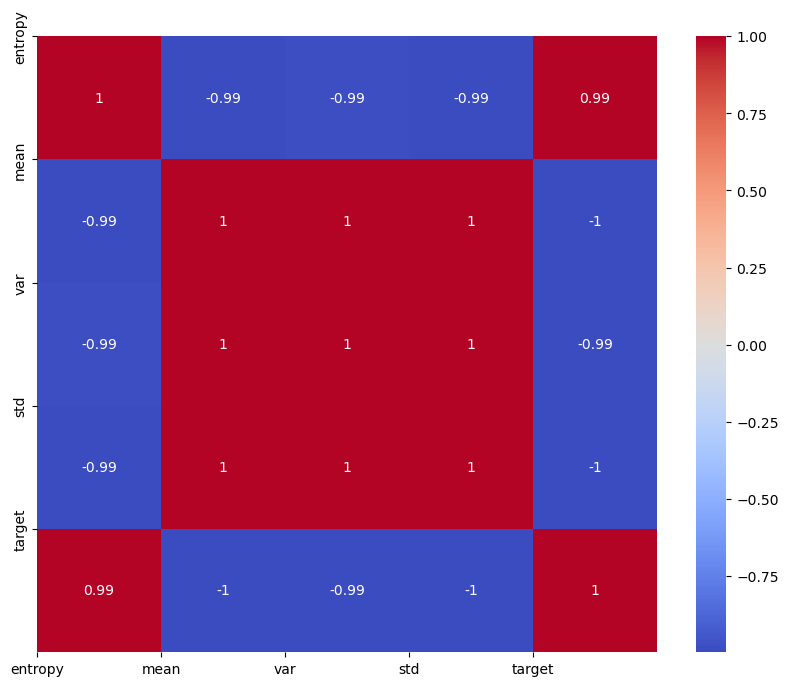

In [28]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df_new_feat.corr()

# Create a heatmap with labels
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add labels to the x and y axis ticks
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Display the plot
plt.show()

In [29]:
# Splitting Data into features and target
x=df_new_feat.loc[:,'mean':'var'].to_numpy() #features
y=df_new_feat.loc[:,'target'].to_numpy() #target

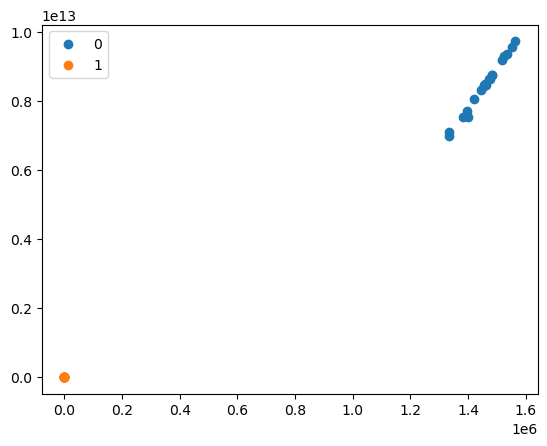

In [30]:
import collections
counter = collections.Counter(y)
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(x[row_ix, 0], x[row_ix, 1], label=label)
plt.legend()
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [47]:
# Training Model - Melakukan training model dengan menggunakan k = 1
from sklearn.neighbors import KNeighborsClassifier
k1 = 1
model_knn_1 = KNeighborsClassifier(n_neighbors = k1)
model_knn_1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
# Predicting
y_pred_1 = model_knn_1.predict(x_test)
print(y_pred_1)

[0 1 1 0 0 1 1 0]


C:\Users\CLARA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [49]:
# Perhitungan Akurasi k = 1
from sklearn import metrics
print("Train set Accuracy : ", metrics.accuracy_score(y_train, model_knn_1.predict(x_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, y_pred_1))

Train set Accuracy :  1.0
Test set Accuracy :  1.0


C:\Users\CLARA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:
# Training Model - Melakukan training model dengan menggunakan k = 2
from sklearn.neighbors import KNeighborsClassifier
k2 = 2
model_knn_2 = KNeighborsClassifier(n_neighbors = k2)
model_knn_2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [51]:
# Predicting
y_pred_2 = model_knn_2.predict(x_test)
print(y_pred_2)

[0 1 1 0 0 1 1 0]


C:\Users\CLARA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
# Perhitungan Akurasi K = 2
from sklearn import metrics
print("Train set Accuracy : ", metrics.accuracy_score(y_train, model_knn_2.predict(x_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, y_pred_2))

Train set Accuracy :  1.0
Test set Accuracy :  1.0


C:\Users\CLARA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [53]:
# Training Model - Melakukan training model dengan menggunakan k = 3
from sklearn.neighbors import KNeighborsClassifier
k3 = 3
model_knn_3 = KNeighborsClassifier(n_neighbors = k3)
model_knn_3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
# Predicting
y_pred_3 = model_knn_3.predict(x_test)
print(y_pred_3)

[0 1 1 0 0 1 1 0]


C:\Users\CLARA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [55]:
# Perhitungan Akurasi K = 3
from sklearn import metrics
print("Train set Accuracy : ", metrics.accuracy_score(y_train, model_knn_3.predict(x_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, y_pred_3))

Train set Accuracy :  1.0
Test set Accuracy :  1.0


C:\Users\CLARA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [56]:
model_eval = pd.DataFrame(columns=['Train Accuracy', 'Test Accuracy'])

# Train Set Accuracy
model_eval.loc['K = 1','Train Accuracy'] = metrics.accuracy_score(y_train, model_knn_1.predict(x_train))
model_eval.loc['K = 2','Train Accuracy'] = metrics.accuracy_score(y_train, model_knn_2.predict(x_train))
model_eval.loc['K = 3','Train Accuracy'] = metrics.accuracy_score(y_train, model_knn_3.predict(x_train))
model_eval 

# Test Set Accuracy 
model_eval.loc['K = 1','Test Accuracy'] = metrics.accuracy_score(y_test, y_pred_1)
model_eval.loc['K = 2','Test Accuracy'] = metrics.accuracy_score(y_test, y_pred_2)
model_eval.loc['K = 3','Test Accuracy'] = metrics.accuracy_score(y_test, y_pred_3)
model_eval 

C:\Users\CLARA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CLARA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Train Accuracy Test Accuracy
K = 1            1.0           1.0
K = 2            1.0           1.0
K = 3            1.0           1.0

# Evaluation

## Accuracy

In [57]:
# Retraining Menggunakan Nilai K dengan Akurasi Terbaik - K = 1
k = 1
model_knn = KNeighborsClassifier(n_neighbors = k)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [58]:
# Predicting
y_pred = model_knn.predict(x_test)
print(y_pred)

[0 1 1 0 0 1 1 0]


C:\Users\CLARA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [59]:
# Perhitungan Akurasi k = 1

print("Train set Accuracy : ", metrics.accuracy_score(y_train, model_knn.predict(x_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, y_pred))
print()
print(f"Achieved accuracy of {metrics.accuracy_score(y_test, y_pred)*100}% on test data")

Train set Accuracy :  1.0
Test set Accuracy :  1.0

Achieved accuracy of 100.0% on test data


C:\Users\CLARA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Confusion Matrix

              precision    recall  f1-score   support

   hold hand       1.00      1.00      1.00         4
   open hand       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



Text(70.72222222222221, 0.5, 'Predicted Values')

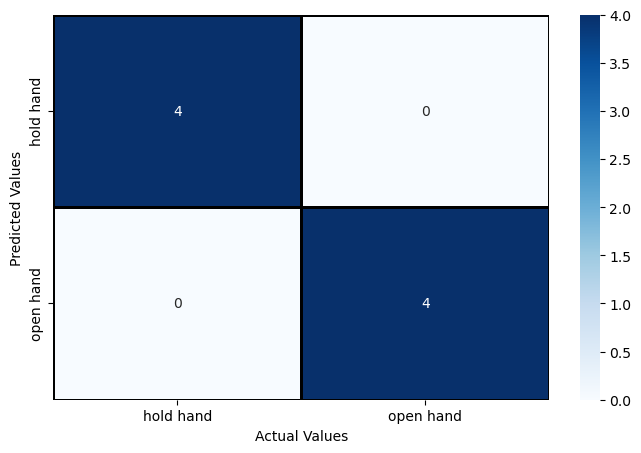

In [60]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
target_names = ['hold hand', 'open hand']
print(classification_report(y_test, y_pred, target_names=target_names))

f, ax = plt.subplots(figsize=(8,5))
cm = confusion_matrix(y_test, y_pred)
cm_labels = ['hold hand', 'open hand']
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='', 
            yticklabels = cm_labels,
            xticklabels = cm_labels, ax=ax)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")